## Table of Contents: <a class="anchor" id="toc"></a>

[Assesement info](#info)<br>
[Field name description](#des)<br>
[Exploration](#exp)<br>
[Exploration Outliers](#out)<br>
[Data Cleaning](#cle)<br>
[Task A](#ta)<br>
    - [Question 1](#que1)<br>
    - [Question 2](#que2)<br>
    - [Question 3](#que3)<br>
[Task B](#tb)<br>
    - [Splitting data](#spl)<br>
    - [Regression Analysis](#reg)<br>

## Assesement info <a class="anchor" id="info"></a>

Section 3: Statistical Data Analysis (90%) 

Introduction:  

Cab Taxi is a thriving transportation business in many parts of the world. It 
facilitates easy movement of people, goods, and services from one location to 
another. The aim of this data analysis task is to analyse the Yellow Medallion 
Taxicabs dataset: the famous New York City (NYC) yellow taxis that provide 
transportation exclusively through street hails (i.e., the pickups are not pre-
arranged). Passengers stand by the street and hail on an available taxi with 
their hand. In this analysis, you will answer some business questions and 
perform regression analysis to predict the total amount paid by the 
passengers after a given trip.  

Data: 
The dataset was sourced from the NYC Taxi & Limousine Commission (TLC) 
official website. The dataset contains several explanatory variables used to 
assess a completed trip such as pick-up and drop-off dates/times, pick-up and 
drop-off locations, trip distances, itemized fares, rate types, payment types, 
and driver-reported passenger counts. You can find the complete description 
of the dataset on the course page. A subsample of the original data is 
provided for you to use for the tasks itemised in the following sections. The 
trip records are divided into two files Main Sample and New Sample, 
respectively. https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

[Back to Table of Contents](#toc)<br>

## Assesement info <a class="anchor" id="info"></a>

Section 3: Statistical Data Analysis (90%) 

Introduction:  

Cab Taxi is a thriving transportation business in many parts of the world. It 
facilitates easy movement of people, goods, and services from one location to 
another. The aim of this data analysis task is to analyse the Yellow Medallion 
Taxicabs dataset: the famous New York City (NYC) yellow taxis that provide 
transportation exclusively through street hails (i.e., the pickups are not pre-
arranged). Passengers stand by the street and hail on an available taxi with 
their hand. In this analysis, you will answer some business questions and 
perform regression analysis to predict the total amount paid by the 
passengers after a given trip.  

Data: 
The dataset was sourced from the NYC Taxi & Limousine Commission (TLC) 
official website. The dataset contains several explanatory variables used to 
assess a completed trip such as pick-up and drop-off dates/times, pick-up and 
drop-off locations, trip distances, itemized fares, rate types, payment types, 
and driver-reported passenger counts. You can find the complete description 
of the dataset on the course page. A subsample of the original data is 
provided for you to use for the tasks itemised in the following sections. The 
trip records are divided into two files Main Sample and New Sample, 
respectively. 

[Back to Table of Contents](#toc)<br>

## Field Name Description <a class="anchor" id="des"></a>

VendorID - A code indicating the TPEP provider that provided the record. 
1. Creative Mobile Technologies 
2. VeriFone Inc.

tpep_pickup_datetime - The date and time when the meter was engaged. 

tpep_dropoff_datetime - The date and time when the meter was disengaged. 

Passenger_count - The number of passengers in the vehicle. This is a driver-entered value. 

Trip_distance - The elapsed trip distance in miles reported by the taximeter. 

Pickup_longitude - Longitude where the meter was engaged. 

Pickup_latitude - Latitude where the meter was engaged. 

RateCodeID 

The final rate code in effect at the end of the trip. 
1. Standard rate 
2. JFK 
3. Newark 
4. Nassau or Westchester 
5. Negotiated fare 
6. Group ride 


Store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. 
- Y = store and forward trip 
- N = not a store and forward trip 

Dropoff_longitude - Longitude where the meter was disengaged. 

Dropoff_ latitude - Latitude where the meter was disengaged. 

Payment_type - A numeric code signifying how the passenger paid for the trip. 
1. Credit card 
2. Cash 
3. No charge 
4. Dispute 
5. Unknown 
6. Voided trip 

Fare_amount - The time-and-distance fare calculated by the meter. 

Extra - Miscellaneous extras and surcharges. Currently, this only includes. the $0.50 and $1 rush hour and overnight charges. 

MTA_tax - 0.50 MTA tax that is automatically triggered based on the metered rate in use. 

Improvement_surcharge - 0.30 improvement surcharge assessed trips at the flag drop. 


Tip_amount - Tip amount – This field is automatically populated for credit card tips.Cash tips are not included. 

Tolls_amount - Total amount of all tolls paid in trip. 

Total_amount - The total amount charged to passengers. Does not include cash tips.

[Back to Table of Contents](#toc)<br>

## Exploration <a class="anchor" id="exp"></a>

In [1]:
# read csv into pandas dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


with open('Main Sample.csv') as f:
    df = pd.read_csv(f)

In [2]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10906858 entries, 0 to 10906857
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.5+ GB


In [4]:
# convert to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [5]:
# check for duplicates
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
# convert to boolean store_and_fwd_flag column
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': False, 'Y': True})

df['store_and_fwd_flag'].unique()

array([False,  True])

In [8]:
# add an extra column for trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

df.value_counts('trip_duration')

trip_duration
6.466667         12459
6.300000         12458
5.900000         12380
5.800000         12365
6.233333         12341
                 ...  
629.116667           1
628.300000           1
626.800000           1
626.583333           1
119912.700000        1
Length: 12697, dtype: int64

In [9]:
df.describe().round(2)

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,10906857.00,10906857.00,10906857.00,10906857.00,10906857.00,10906857.00,10906857.00,10906857.00,10906857.00,10906857.00,10906857.00,10906857.00,10906857.00,10906857.00,10906857.00,10906857.00,10906857.00
mean,1.54,1.67,4.65,-72.82,40.11,1.04,-72.89,40.15,1.35,12.49,0.31,0.50,1.75,0.29,0.30,15.64,15.27
std,0.50,1.32,2981.10,9.17,5.05,0.52,8.90,4.90,0.49,35.56,0.42,0.05,2.62,1.69,0.01,36.41,86.91
min,1.00,0.00,0.00,-121.93,0.00,1.00,-121.93,0.00,1.00,-957.60,-42.61,-0.50,-220.80,-17.40,-0.30,-958.40,-43.95
25%,1.00,1.00,1.00,-73.99,40.74,1.00,-73.99,40.73,1.00,6.50,0.00,0.50,0.00,0.00,0.30,8.30,6.33
50%,2.00,1.00,1.67,-73.98,40.75,1.00,-73.98,40.75,1.00,9.00,0.00,0.50,1.26,0.00,0.30,11.62,10.47
75%,2.00,2.00,3.08,-73.97,40.77,1.00,-73.96,40.77,2.00,14.00,0.50,0.50,2.32,0.00,0.30,17.16,16.88
max,2.00,9.00,8000010.00,0.00,60.91,99.00,0.00,60.91,5.00,111270.85,648.87,89.70,998.14,980.15,0.30,111271.65,119912.70


## Pandas Profiling & Dtale

In [10]:
import pandas_profiling as pp
#pp.ProfileReport(df)

C:\Users\krist\AppData\Local\Temp\ipykernel_12404\1940891308.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [11]:
#dt = dtale.show(df, ignore_duplicate=True)
# print(d._main_url)
#dt.open_browser()

## Exploration outliers<a class="anchor" id="out"></a>

In [12]:
mod_cols_header = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_duration']

In [13]:
def detect_outliers_iqr(data, thres=1.5):
    data['outlier'] = ''
    data['outlier_count'] = 0
    for col in data.columns[:-2]:  # Exclude the 'outlier' and 'outlier_count' columns
        column_data = data[col]
        q1 = column_data.quantile(0.25)
        q3 = column_data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - thres * iqr
        upper_bound = q3 + thres * iqr

        # Update the 'outlier' column with the column name where an outlier is detected
        data.loc[((data[col] < lower_bound) | (data[col] > upper_bound)), 'outlier'] += col + ', '
        
        # Update the 'outlier_count' column with the count of outliers for each row
        data.loc[((data[col] < lower_bound) | (data[col] > upper_bound)), 'outlier_count'] += 1

    return data

# Detect outliers using IQR and update the 'outlier' and 'outlier_count' columns
df_no_out = detect_outliers_iqr(df[mod_cols_header])

C:\Users\krist\AppData\Local\Temp\ipykernel_12404\2433350462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['outlier'] = ''


In [14]:
df_no_out.value_counts('outlier_count')

outlier_count
0     8058491
1     1355581
2      268316
4      254471
6      230058
5      205102
7      164344
8      129213
3      125007
9       97054
10      16359
11       2512
12        340
13          9
dtype: int64

In [15]:
df_no_out.value_counts('outlier_count').sum()

10906857

In [16]:
#df_no_out = df_no_out[df_no_out['outlier_count'] > 0]

In [17]:

df_no_out2 = df_no_out[df_no_out['outlier_count'] > 0].copy()

C:\Users\krist\AppData\Local\Temp\ipykernel_12404\3442487179.py:5: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(1, 1400000, 200000)


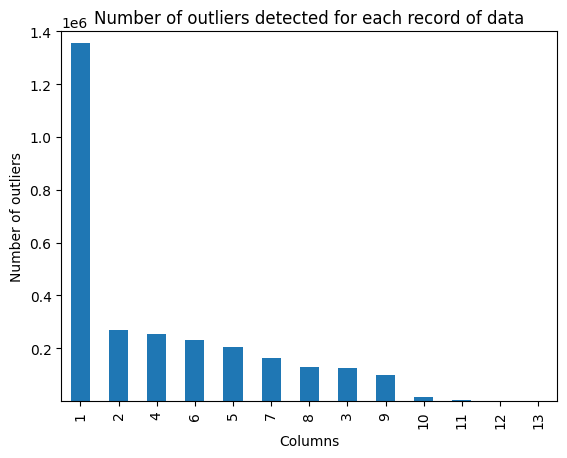

In [18]:
df_no_out2['outlier_count'].value_counts().plot(kind='bar')
#plt.plot(x, y)
# Set the x-axis limits
#plt.xlim(1)
plt.ylim(1, 1400000, 200000)
plt.xlabel('Columns')
plt.ylabel('Number of outliers')
plt.title('Number of outliers detected for each record of data')
plt.show()



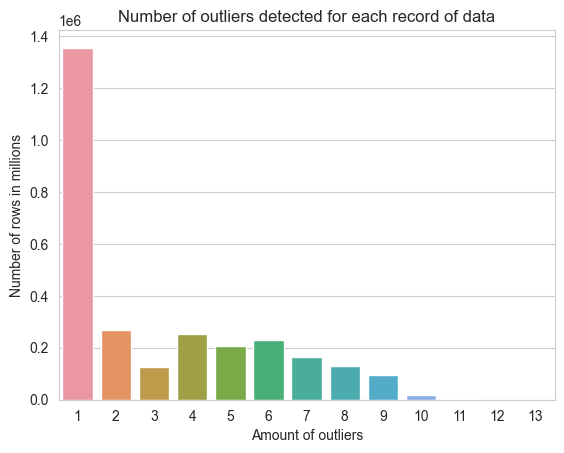

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='outlier_count', data=df_no_out2)
# Set labels

plt.xlabel('Amount of outliers')
plt.ylabel('Number of rows in millions')
plt.title('Number of outliers detected for each record of data')
plt.savefig('outlier_count.png')
plt.show()
# save figure


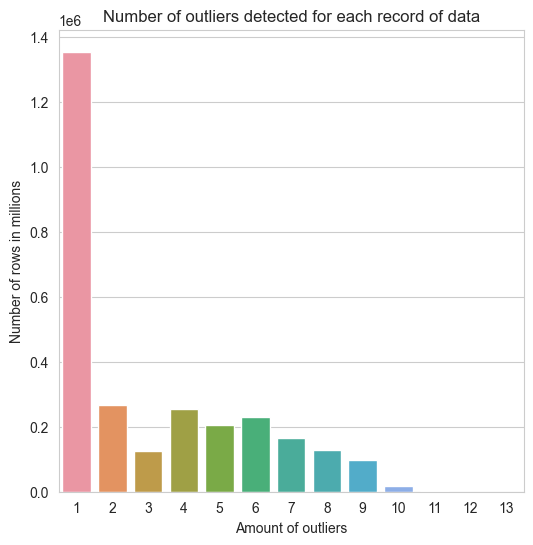

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


#ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.6,0.8, 1,1.2, 1.4])
#ax.set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.6,0.8, 1,1.2, 1.4])
ys = [0, 0.1, 0.2, 0.3, 0.4, 0.6,0.8, 1,1.2, 1.4]
#set_yticklabels(ys)

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust the aspect ratio using figsize

sns.countplot(x='outlier_count', data=df_no_out2)
#xs = ax.get_xticks()

# Set labels
ax.set_xlabel('Amount of outliers')
ax.set_ylabel('Number of rows in millions')
ax.set_title('Number of outliers detected for each record of data')


plt.show()

[Back to Table of Contents](#toc)<br>

## Data Cleaning <a class="anchor" id="cle"></a>

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
Count_of_df = df['VendorID'].count()

<AxesSubplot: >

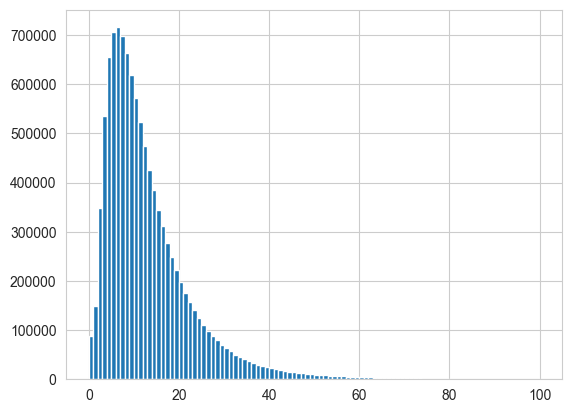

In [23]:
# plot histogram of trip duration removing bottom 1% of data
#df['trip_duration'].quantile(0.01)


df['trip_duration'].hist(bins=100, range=(0,100))

In [24]:
count_trip_duration_above_100 = df['trip_duration'] > 200
print(count_trip_duration_above_100.sum())

16819


In [25]:
count_trip_duration_above_100.count()

10906857

In [26]:
#count_trip_duration_above_100 = df[(df['trip_distance'] == 0) & (df['trip_duration'] > 0) & (df['trip_duration'] < 1)]
count_trip_duration_above_100 = df[(df['fare_amount'] == 0)]
#count_trip_duration_above_100.count()
print(Count_of_df)
print(count_trip_duration_above_100['VendorID'].count())
print(Count_of_df - count_trip_duration_above_100['VendorID'].count())

10906857
3177
10903680


<AxesSubplot: >

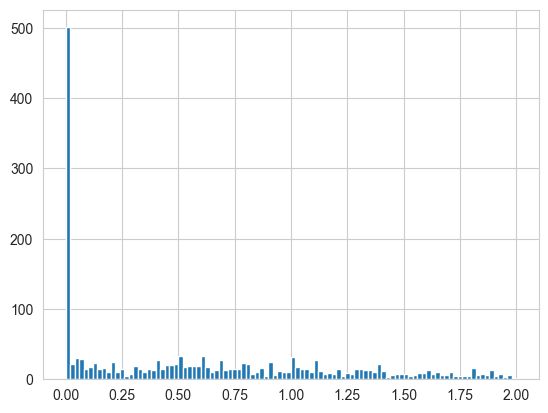

In [27]:
count_trip_duration_above_100['trip_duration'].hist(bins=100, range=(0,2))

## using inter quartertile range to remove outliers trip distance <a class="anchor" id="out"></a>

In [28]:
# use interquartile range to remove outliers from trip distance
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['trip_distance'] >= Q1 - 1.5 * IQR) & (df['trip_distance'] <= Q3 + 1.5 * IQR)]

print(Count_of_df)
print(df['VendorID'].count())
print(Count_of_df - df['VendorID'].count())

10906857
9754220
1152637


## Removing rows with 0 trip duration or 0 trip distance <a class="anchor" id="cle"></a>

In [29]:
df = df[(df['trip_duration'] > 0.75) & (df['trip_duration'] < 200)]

print(Count_of_df)
print(df['VendorID'].count())
print(Count_of_df - df['VendorID'].count())

10906857
9668970
1237887


<AxesSubplot: >

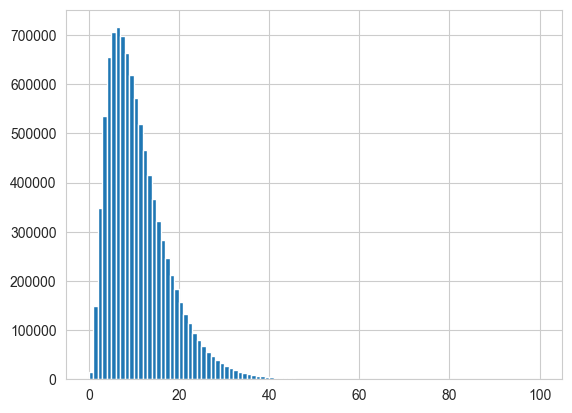

In [30]:
df['trip_duration'].hist(bins=100, range=(0,100))

# limit that data to january 2016 and ending in 1 febuari

In [31]:
# Define the date range
start_date = pd.Timestamp('2016-01-01')
end_date = pd.Timestamp('2016-02-01')
# Filter the dataframe to include only trips between the start and end dates
df = df[(df['tpep_dropoff_datetime'] >= start_date) & (df['tpep_dropoff_datetime'] < end_date)]


print(Count_of_df - df['VendorID'].count())

1238792


# remove negative values

# Replace 0 values on passenger count with 1

In [32]:
# replace 0 passenger count with 1

df['passenger_count'] = df['passenger_count'].replace(0, 1)


In [33]:
df = df[(df['fare_amount'] != 0)]


In [34]:
# use interquartile range to remove outliers from fare amount
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['fare_amount'] >= Q1 - 1.5 * IQR) & (df['fare_amount'] <= Q3 + 1.5 * IQR)]

In [35]:
print(Count_of_df - df['VendorID'].count())

1428722


In [36]:
print(Count_of_df - df['VendorID'].count())

1428722


## Replace geolocation with 0 values with dataset median then Remove any value locations outside of NYC <a class="anchor" id="loc"></a>

In [37]:
# remove rows with rate code id 99 and geographic coordinates that are 0.0

df = df[(df['RatecodeID'] != 99) & (df['pickup_longitude'] != 0.0) & (df['pickup_latitude'] != 0.0) & (df['dropoff_longitude'] != 0.0) & (df['dropoff_latitude'] != 0.0)]

In [38]:
# Replace 0 values in location with the median of rows with the same rate code

df.loc[df['pickup_longitude'] == 0, 'pickup_longitude'] = df.loc[df['pickup_longitude'] != 0].groupby('RatecodeID')['pickup_longitude'].transform('median')
df.loc[df['pickup_latitude'] == 0, 'pickup_latitude'] = df.loc[df['pickup_latitude'] != 0].groupby('RatecodeID')['pickup_latitude'].transform('median')
df.loc[df['dropoff_longitude'] == 0, 'dropoff_longitude'] = df.loc[df['dropoff_longitude'] != 0].groupby('RatecodeID')['dropoff_longitude'].transform('median')
df.loc[df['dropoff_latitude'] == 0, 'dropoff_latitude'] = df.loc[df['dropoff_latitude'] != 0].groupby('RatecodeID')['dropoff_latitude'].transform('median') 


In [39]:
# replace rate code 99 with the rate code of a row that has closest pickup and dropoff coordinates
df.loc[df['RatecodeID'] == 99, 'RatecodeID'] = df.loc[df['RatecodeID'] != 99].groupby(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])['RatecodeID'].transform('median')

In [40]:
# Remove locations outside of NYC

# Define the latitude and longitude ranges
lat_min = 40.5
lat_max = 41.2
lon_min = -74.3
lon_max = -73.5

# Filter the dataframe to include only trips within the latitude and longitude ranges
df = df[(df['pickup_latitude'] >= lat_min) & (df['pickup_latitude'] <= lat_max) & (df['pickup_longitude'] >= lon_min) & (df['pickup_longitude'] <= lon_max) & (df['dropoff_latitude'] >= lat_min) & (df['dropoff_latitude'] <= lat_max) & (df['dropoff_longitude'] >= lon_min) & (df['dropoff_longitude'] <= lon_max)]

print(Count_of_df - df['VendorID'].count())

1569838


In [41]:
df.describe().round(2)

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00
mean,1.54,1.67,1.82,-73.98,40.75,1.00,-73.98,40.75,1.35,9.28,0.32,0.50,1.30,0.01,0.30,11.71,10.61
std,0.50,1.33,1.20,0.02,0.02,0.06,0.02,0.03,0.49,4.06,0.43,0.01,1.43,0.29,0.01,4.83,6.13
min,1.00,1.00,0.00,-74.28,40.51,1.00,-74.30,40.52,1.00,-3.00,-1.00,-0.50,-70.00,-5.54,-0.30,-73.80,0.77
25%,1.00,1.00,0.92,-73.99,40.74,1.00,-73.99,40.74,1.00,6.00,0.00,0.50,0.00,0.00,0.30,8.15,5.95
50%,2.00,1.00,1.50,-73.98,40.75,1.00,-73.98,40.76,1.00,8.50,0.00,0.50,1.20,0.00,0.30,10.75,9.42
75%,2.00,2.00,2.40,-73.97,40.77,1.00,-73.97,40.77,2.00,11.50,0.50,0.50,2.05,0.00,0.30,14.30,14.12
max,2.00,9.00,6.20,-73.51,41.14,6.00,-73.51,41.14,5.00,21.00,648.87,10.35,998.14,100.00,0.30,1004.94,199.30


## Create new column for day of the week <a class="anchor" id="tod"></a>

In [42]:
df['day_of_week'] = df['tpep_dropoff_datetime'].dt.day_name()

## Create new column for time of day <a class="anchor" id="tod"></a>

In [43]:
# Create a new column for the time of day category
df['time_of_day'] = ''

# Assign the time of day category based on the hour of the tpep_pickup_datetime
df.loc[(df['tpep_pickup_datetime'].dt.hour >= 6) & (df['tpep_pickup_datetime'].dt.hour < 12), 'time_of_day'] = 'morning'
df.loc[(df['tpep_pickup_datetime'].dt.hour >= 12) & (df['tpep_pickup_datetime'].dt.hour < 18), 'time_of_day'] = 'afternoon'
df.loc[(df['tpep_pickup_datetime'].dt.hour >= 18) & (df['tpep_pickup_datetime'].dt.hour < 24), 'time_of_day'] = 'evening'
df.loc[(df['tpep_pickup_datetime'].dt.hour >= 0) & (df['tpep_pickup_datetime'].dt.hour < 6), 'time_of_day'] = 'night'


# Acounnting for weather anomalies in january 2016

In [44]:
# remove week of weather anomalies (Jan 22 - Jan 27) from the dataset

# Define the date range
start_date = pd.Timestamp('2016-01-01')
end_date = pd.Timestamp('2016-01-08')

# Filter the dataframe to include only trips between the start and end dates
#df = df[(df['trip_start_date'] >= start_date) & (df['trip_start_date'] < end_date)]

print(Count_of_df - df['VendorID'].count())

1569838


In [45]:
# Assuming your DataFrame is named df and has a datetime column named 'date'
start_date = pd.to_datetime('2016-01-22')  # The start date of the week to remove
end_date = start_date + pd.DateOffset(weeks=1)  # The end date of the week to remove

# Create a boolean mask that selects rows outside the week to remove
mask = (df['tpep_dropoff_datetime'] < start_date) | (df['tpep_dropoff_datetime'] >= end_date)
# Apply the mask to the DataFrame to keep only the rows outside the specified week
df_no_anomaly = df[mask].copy()

In [46]:
df_no_anomaly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7647232 entries, 5 to 10906853
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   pickup_longitude       float64       
 6   pickup_latitude        float64       
 7   RatecodeID             int64         
 8   store_and_fwd_flag     bool          
 9   dropoff_longitude      float64       
 10  dropoff_latitude       float64       
 11  payment_type           int64         
 12  fare_amount            float64       
 13  extra                  float64       
 14  mta_tax                float64       
 15  tip_amount             float64       
 16  tolls_amount           float64       
 17  improvement_surcharge  float64       
 18  total_amount         

In [47]:
df_no_anomaly.describe().round(2)

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,7647232.00,7647232.00,7647232.00,7647232.00,7647232.00,7647232.00,7647232.00,7647232.00,7647232.00,7647232.00,7647232.00,7647232.00,7647232.00,7647232.00,7647232.00,7647232.00,7647232.00
mean,1.54,1.68,1.83,-73.98,40.75,1.00,-73.98,40.75,1.36,9.19,0.31,0.50,1.28,0.01,0.30,11.59,10.32
std,0.50,1.33,1.21,0.02,0.02,0.06,0.02,0.03,0.49,4.02,0.43,0.01,1.44,0.29,0.01,4.78,5.92
min,1.00,1.00,0.00,-74.28,40.51,1.00,-74.30,40.52,1.00,-3.00,-1.00,-0.50,-2.70,-5.54,-0.30,-8.84,0.77
25%,1.00,1.00,0.92,-73.99,40.74,1.00,-73.99,40.74,1.00,6.00,0.00,0.50,0.00,0.00,0.30,8.00,5.82
50%,2.00,1.00,1.50,-73.98,40.75,1.00,-73.98,40.76,1.00,8.50,0.00,0.50,1.16,0.00,0.30,10.56,9.18
75%,2.00,2.00,2.40,-73.97,40.77,1.00,-73.97,40.77,2.00,11.50,0.50,0.50,2.00,0.00,0.30,14.30,13.72
max,2.00,9.00,6.20,-73.53,41.14,6.00,-73.53,41.14,5.00,21.00,648.87,10.35,998.14,100.00,0.30,1004.94,199.30


In [48]:
df.describe().round(2)

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00,9337019.00
mean,1.54,1.67,1.82,-73.98,40.75,1.00,-73.98,40.75,1.35,9.28,0.32,0.50,1.30,0.01,0.30,11.71,10.61
std,0.50,1.33,1.20,0.02,0.02,0.06,0.02,0.03,0.49,4.06,0.43,0.01,1.43,0.29,0.01,4.83,6.13
min,1.00,1.00,0.00,-74.28,40.51,1.00,-74.30,40.52,1.00,-3.00,-1.00,-0.50,-70.00,-5.54,-0.30,-73.80,0.77
25%,1.00,1.00,0.92,-73.99,40.74,1.00,-73.99,40.74,1.00,6.00,0.00,0.50,0.00,0.00,0.30,8.15,5.95
50%,2.00,1.00,1.50,-73.98,40.75,1.00,-73.98,40.76,1.00,8.50,0.00,0.50,1.20,0.00,0.30,10.75,9.42
75%,2.00,2.00,2.40,-73.97,40.77,1.00,-73.97,40.77,2.00,11.50,0.50,0.50,2.05,0.00,0.30,14.30,14.12
max,2.00,9.00,6.20,-73.51,41.14,6.00,-73.51,41.14,5.00,21.00,648.87,10.35,998.14,100.00,0.30,1004.94,199.30


In [49]:
# open dtale in browser
import dtale
dt = dtale.show(df, ignore_duplicate=True)
# print(d._main_url)
dt.open_browser()


In [50]:
#pp.ProfileReport(df)

[Back to Table of Contents](#toc)<br>

## Task A (30%): <a class="anchor" id="ta"></a>

### Question 1: <a class="anchor" id="que1"></a>
What is the average demand for the taxis in the days of the 
week (i.e., daily trend). Which of the days has the highest and 
which lowest demand? 

In [51]:
no_anomaly_df2 = df_no_anomaly.copy()

# group by date and not time

no_anomaly_df2['tpep_dropoff_datetime'] = no_anomaly_df2['tpep_dropoff_datetime'].dt.date
no_anomaly_df2['demand'] = 1
no_anomaly_df2['demand'] = no_anomaly_df2.groupby(['tpep_dropoff_datetime'])['demand'].transform('sum')
no_anomaly_df2 = no_anomaly_df2.drop_duplicates(subset=['tpep_dropoff_datetime'])
no_anomaly_df2['day_count'] = 1
no_anomaly_df2['day_count'] = no_anomaly_df2.groupby(['day_of_week'])['day_count'].transform('sum')

no_anomaly_df2['demand'] = no_anomaly_df2.groupby(['day_of_week'])['demand'].transform('sum')
no_anomaly_df2['avg_demand'] = no_anomaly_df2['demand'] / no_anomaly_df2['day_count']
no_anomaly_df2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,day_of_week,time_of_day,demand,day_count,avg_demand
5,2,2016-01-01 00:00:00,2016-01-01,2,5.52,-73.980118,40.743050,1,False,-73.913490,...,0.00,0.0,0.3,20.30,18.500000,Friday,night,1320508,4,330127.00
176,2,2016-01-29 09:18:19,2016-01-29,1,1.78,-73.949547,40.771763,1,False,-73.963699,...,2.45,0.0,0.3,12.25,10.616667,Friday,morning,1320508,4,330127.00
1056,1,2016-01-02 00:46:26,2016-01-02,2,0.70,-73.997963,40.760559,1,False,-73.986671,...,1.00,0.0,0.3,8.30,6.233333,Saturday,night,1366983,4,341745.75
12605,2,2016-01-03 20:00:57,2016-01-03,1,4.68,-73.966454,40.804760,1,False,-74.000114,...,0.00,0.0,0.3,18.80,18.450000,Sunday,evening,1198372,4,299593.00
12875,2,2016-01-04 00:05:37,2016-01-04,3,4.07,-73.964691,40.803478,1,False,-73.983757,...,0.00,0.0,0.3,18.30,20.416667,Monday,night,854892,3,284964.00


In [52]:
no_anomaly_df2 = no_anomaly_df2.drop_duplicates(subset=['day_of_week'])
no_anomaly_df2 = no_anomaly_df2.sort_values(by=['day_of_week']).reset_index(drop=True)
no_anomaly_df2.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,day_of_week,time_of_day,demand,day_count,avg_demand
0,2,2016-01-01 00:00:00,2016-01-01,2,5.52,-73.980118,40.743050,1,False,-73.913490,...,0.00,0.0,0.3,20.30,18.500000,Friday,night,1320508,4,330127.000000
1,2,2016-01-04 00:05:37,2016-01-04,3,4.07,-73.964691,40.803478,1,False,-73.983757,...,0.00,0.0,0.3,18.30,20.416667,Monday,night,854892,3,284964.000000
2,1,2016-01-02 00:46:26,2016-01-02,2,0.70,-73.997963,40.760559,1,False,-73.986671,...,1.00,0.0,0.3,8.30,6.233333,Saturday,night,1366983,4,341745.750000
3,2,2016-01-03 20:00:57,2016-01-03,1,4.68,-73.966454,40.804760,1,False,-74.000114,...,0.00,0.0,0.3,18.80,18.450000,Sunday,evening,1198372,4,299593.000000
4,1,2016-01-06 23:35:09,2016-01-07,1,4.90,-74.000404,40.728809,1,False,-73.980400,...,5.55,0.0,0.3,27.85,25.833333,Thursday,evening,993089,3,331029.666667
5,1,2016-01-04 22:49:48,2016-01-05,1,0.40,-73.976082,40.740574,1,False,-73.988342,...,0.00,0.0,0.3,5.80,94.000000,Tuesday,evening,942388,3,314129.333333
6,1,2016-01-05 23:38:07,2016-01-06,1,6.00,-73.997330,40.721500,1,False,-73.922554,...,6.50,0.0,0.3,28.30,22.166667,Wednesday,evening,971000,3,323666.666667


In [53]:
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
# Sort the DataFrame by day_of_week using the order of the day_mapping dictionary
no_anomaly_df2 = no_anomaly_df2.set_index('day_of_week').loc[list(day_mapping.values())].reset_index()
no_anomaly_df2.head(20)

,day_of_week,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,time_of_day,demand,day_count,avg_demand
0,Monday,2,2016-01-04 00:05:37,2016-01-04,3,4.07,-73.964691,40.803478,1,False,...,0.5,0.00,0.0,0.3,18.30,20.416667,night,854892,3,284964.000000
1,Tuesday,1,2016-01-04 22:49:48,2016-01-05,1,0.40,-73.976082,40.740574,1,False,...,0.5,0.00,0.0,0.3,5.80,94.000000,evening,942388,3,314129.333333
2,Wednesday,1,2016-01-05 23:38:07,2016-01-06,1,6.00,-73.997330,40.721500,1,False,...,0.5,6.50,0.0,0.3,28.30,22.166667,evening,971000,3,323666.666667
3,Thursday,1,2016-01-06 23:35:09,2016-01-07,1,4.90,-74.000404,40.728809,1,False,...,0.5,5.55,0.0,0.3,27.85,25.833333,evening,993089,3,331029.666667
4,Friday,2,2016-01-01 00:00:00,2016-01-01,2,5.52,-73.980118,40.743050,1,False,...,0.5,0.00,0.0,0.3,20.30,18.500000,night,1320508,4,330127.000000
5,Saturday,1,2016-01-02 00:46:26,2016-01-02,2,0.70,-73.997963,40.760559,1,False,...,0.5,1.00,0.0,0.3,8.30,6.233333,night,1366983,4,341745.750000
6,Sunday,2,2016-01-03 20:00:57,2016-01-03,1,4.68,-73.966454,40.804760,1,False,...,0.5,0.00,0.0,0.3,18.80,18.450000,evening,1198372,4,299593.000000


In [54]:
no_anomaly_df2.describe().round(2)

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,demand,day_count,avg_demand
count,7.00,7.00,7.00,7.00,7.00,7.0,7.00,7.00,7.00,7.00,7.0,7.0,7.00,7.0,7.0,7.00,7.00,7.00,7.00,7.00
mean,1.43,1.57,3.75,-73.98,40.76,1.0,-73.97,40.76,1.57,15.07,0.5,0.5,1.86,0.0,0.3,18.24,29.37,1092461.71,3.43,317893.63
std,0.53,0.79,2.27,0.02,0.03,0.0,0.03,0.02,0.53,6.88,0.0,0.0,2.88,0.0,0.0,8.68,29.14,200903.55,0.53,19823.83
min,1.00,1.00,0.40,-74.00,40.72,1.0,-74.00,40.73,1.00,4.50,0.5,0.5,0.00,0.0,0.3,5.80,6.23,854892.00,3.00,284964.00
25%,1.00,1.00,2.39,-74.00,40.73,1.0,-73.99,40.75,1.00,11.50,0.5,0.5,0.00,0.0,0.3,13.30,18.48,956694.00,3.00,306861.17
50%,1.00,1.00,4.68,-73.98,40.74,1.0,-73.98,40.76,2.00,17.50,0.5,0.5,0.00,0.0,0.3,18.80,20.42,993089.00,3.00,323666.67
75%,2.00,2.00,5.21,-73.97,40.78,1.0,-73.95,40.76,2.00,19.75,0.5,0.5,3.28,0.0,0.3,24.08,24.00,1259440.00,4.00,330578.33
max,2.00,3.00,6.00,-73.96,40.80,1.0,-73.91,40.79,2.00,21.00,0.5,0.5,6.50,0.0,0.3,28.30,94.00,1366983.00,4.00,341745.75


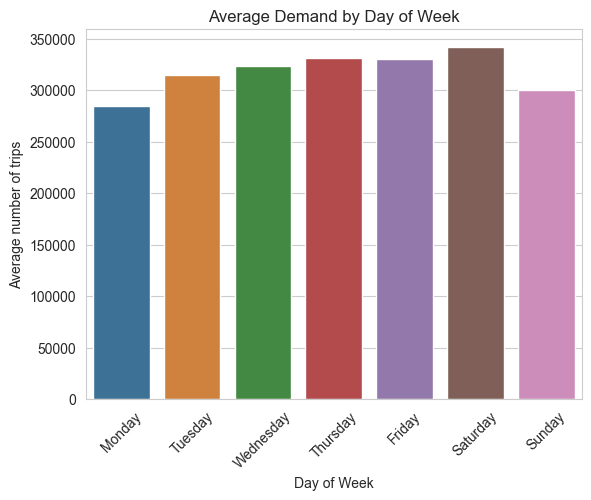

In [55]:
# create a seaborn barplot
sns.barplot(x='day_of_week', y='avg_demand', data=no_anomaly_df2, saturation=0.6)

# sort the x-axis values by weekday
plt.xticks(rotation=45)

# set the title
plt.title('Average Demand by Day of Week')

# set the x-axis label
plt.xlabel('Day of Week')

# set the y-axis label
plt.ylabel('Average number of trips')

#save the plot
plt.savefig('Average_Demand_Day.png')
# show the plot
plt.show()




In [56]:
# esay way to do it

"""

no_anomaly_df2['demand'] = no_anomaly_df2.groupby(['day_of_week', 'time_of_day'])['demand'].transform('sum')

no_anomaly_df2 = no_anomaly_df2.drop_duplicates(subset=['day_of_week', 'time_of_day'])

no_anomaly_df2 = no_anomaly_df2.sort_values(by=['day_of_week', 'time_of_day'])

no_anomaly_df2

no_anomaly_df2['demand'] = no_anomaly_df2['demand'].astype(int)


no_anomaly_df2.head(20)"""

"\n\nno_anomaly_df2['demand'] = no_anomaly_df2.groupby(['day_of_week', 'time_of_day'])['demand'].transform('sum')\n\nno_anomaly_df2 = no_anomaly_df2.drop_duplicates(subset=['day_of_week', 'time_of_day'])\n\nno_anomaly_df2 = no_anomaly_df2.sort_values(by=['day_of_week', 'time_of_day'])\n\nno_anomaly_df2\n\nno_anomaly_df2['demand'] = no_anomaly_df2['demand'].astype(int)\n\n\nno_anomaly_df2.head(20)"

In [57]:
#sort values
"""
day_of_week['day_of_week'] = pd.Categorical(day_of_week['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

day_of_week = day_of_week.sort_values('day_of_week')"""

"\nday_of_week['day_of_week'] = pd.Categorical(day_of_week['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)\n\nday_of_week = day_of_week.sort_values('day_of_week')"

In [58]:
# aggregate the data by day of week and time of day
df_agg = df.groupby(['day_of_week', 'time_of_day'])['trip_duration'].count()

# unstack the data
df_unstacked = df_agg.unstack()

## doesnt work not an even amount of days in the week

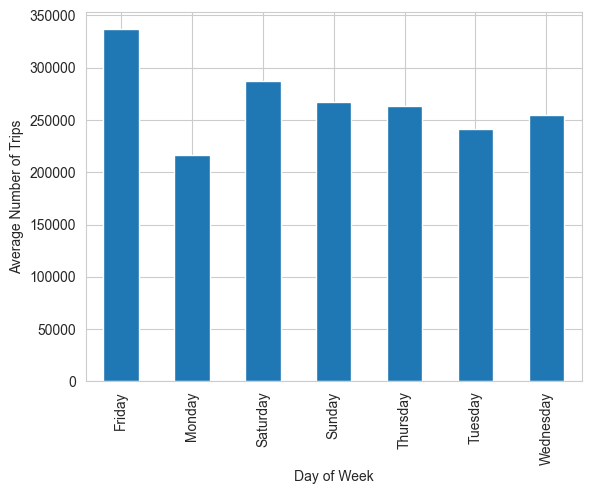

In [59]:
# Find the minimum and maximum date in the dataset
min_date = df['tpep_dropoff_datetime'].min().date()
max_date = df['tpep_dropoff_datetime'].max().date()

# Calculate the total number of weeks in the dataset
total_weeks = np.ceil((max_date - min_date).days / 7)

# Group by day_of_week and count the number of trips
trip_counts = df.groupby('day_of_week')['trip_duration'].count()

# Calculate the average number of trips per weekday
average_trips = trip_counts / total_weeks

# Plot the bar chart
average_trips.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Trips')
plt.show()

[Back to Table of Contents](#toc)<br>

### Question 2: <a class="anchor" id="que2"></a>
Which time of the day (morning, afternoon, evening, and night) 
is likely be a peak period for the taxi’s operation from the data? 

In [60]:
no_anomaly_Q2 = df_no_anomaly.copy()

In [61]:
no_anomaly_Q2['tpep_dropoff_datetime'] = no_anomaly_Q2['tpep_dropoff_datetime'].dt.date
no_anomaly_Q2['demand'] = 1
no_anomaly_Q2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,day_of_week,time_of_day,demand
5,2,2016-01-01 00:00:00,2016-01-01,2,5.52,-73.980118,40.743050,1,False,-73.913490,...,0.5,0.5,0.0,0.0,0.3,20.3,18.500000,Friday,night,1
7,1,2016-01-01 00:00:01,2016-01-01,1,1.20,-73.979424,40.744614,1,False,-73.992035,...,0.5,0.5,0.0,0.0,0.3,10.3,11.900000,Friday,night,1
8,1,2016-01-01 00:00:02,2016-01-01,1,6.00,-73.947151,40.791046,1,False,-73.920769,...,0.5,0.5,0.0,0.0,0.3,19.3,11.200000,Friday,night,1
9,2,2016-01-01 00:00:02,2016-01-01,1,3.21,-73.998344,40.723896,1,False,-73.995850,...,0.5,0.5,0.0,0.0,0.3,12.8,11.100000,Friday,night,1
10,2,2016-01-01 00:00:03,2016-01-01,1,0.79,-74.006149,40.744919,1,False,-73.993797,...,0.5,0.5,0.0,0.0,0.3,7.3,6.266667,Friday,night,1


In [62]:
no_anomaly_Q2['demand'] = no_anomaly_Q2.groupby(['time_of_day','day_of_week','tpep_dropoff_datetime'])['demand'].transform('sum')
no_anomaly_Q2 = no_anomaly_Q2.drop_duplicates(subset=['tpep_dropoff_datetime','time_of_day'])
no_anomaly_Q2.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,day_of_week,time_of_day,demand
5,2,2016-01-01 00:00:00,2016-01-01,2,5.52,-73.980118,40.743050,1,False,-73.913490,...,0.5,0.5,0.00,0.0,0.3,20.30,18.500000,Friday,night,100741
176,2,2016-01-29 09:18:19,2016-01-29,1,1.78,-73.949547,40.771763,1,False,-73.963699,...,0.0,0.5,2.45,0.0,0.3,12.25,10.616667,Friday,morning,90290
1056,1,2016-01-02 00:46:26,2016-01-02,2,0.70,-73.997963,40.760559,1,False,-73.986671,...,0.5,0.5,1.00,0.0,0.3,8.30,6.233333,Saturday,night,31403
12605,2,2016-01-03 20:00:57,2016-01-03,1,4.68,-73.966454,40.804760,1,False,-74.000114,...,0.5,0.5,0.00,0.0,0.3,18.80,18.450000,Sunday,evening,65307
12875,2,2016-01-04 00:05:37,2016-01-04,3,4.07,-73.964691,40.803478,1,False,-73.983757,...,0.5,0.5,0.00,0.0,0.3,18.30,20.416667,Monday,night,13474


In [63]:
result = no_anomaly_Q2[no_anomaly_Q2["tpep_dropoff_datetime"] == pd.to_datetime('2016-01-02')]

result.head()

c:\Users\krist\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,day_of_week,time_of_day,demand
1056,1,2016-01-02 00:46:26,2016-01-02,2,0.7,-73.997963,40.760559,1,False,-73.986671,...,0.5,0.5,1.0,0.0,0.3,8.3,6.233333,Saturday,night,31403
30724,1,2016-01-02 06:00:03,2016-01-02,1,1.1,-73.996208,40.736877,1,False,-73.984604,...,0.0,0.5,0.0,0.0,0.3,6.3,4.300000,Saturday,morning,42004
130203,1,2016-01-02 20:48:33,2016-01-02,1,2.1,-74.002693,40.739517,1,False,-73.982025,...,0.5,0.5,0.0,0.0,0.3,14.3,17.233333,Saturday,evening,99188
462538,1,2016-01-02 12:00:00,2016-01-02,3,1.5,-73.968102,40.797188,1,False,-73.951485,...,0.0,0.5,0.0,0.0,0.3,8.3,7.483333,Saturday,afternoon,94104


In [64]:
no_anomaly_Q2['day_count'] = 1
no_anomaly_Q2['day_count'] = no_anomaly_Q2.groupby(['time_of_day'])['day_count'].transform('sum')
no_anomaly_Q2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,day_of_week,time_of_day,demand,day_count
5,2,2016-01-01 00:00:00,2016-01-01,2,5.52,-73.980118,40.743050,1,False,-73.913490,...,0.5,0.00,0.0,0.3,20.30,18.500000,Friday,night,100741,24
176,2,2016-01-29 09:18:19,2016-01-29,1,1.78,-73.949547,40.771763,1,False,-73.963699,...,0.5,2.45,0.0,0.3,12.25,10.616667,Friday,morning,90290,24
1056,1,2016-01-02 00:46:26,2016-01-02,2,0.70,-73.997963,40.760559,1,False,-73.986671,...,0.5,1.00,0.0,0.3,8.30,6.233333,Saturday,night,31403,24
12605,2,2016-01-03 20:00:57,2016-01-03,1,4.68,-73.966454,40.804760,1,False,-74.000114,...,0.5,0.00,0.0,0.3,18.80,18.450000,Sunday,evening,65307,24
12875,2,2016-01-04 00:05:37,2016-01-04,3,4.07,-73.964691,40.803478,1,False,-73.983757,...,0.5,0.00,0.0,0.3,18.30,20.416667,Monday,night,13474,24


In [65]:
no_anomaly_Q2['demand'] = no_anomaly_Q2.groupby(['time_of_day'])['demand'].transform('sum')
no_anomaly_Q2['avg_demand'] = no_anomaly_Q2['demand'] / no_anomaly_Q2['day_count']
no_anomaly_Q2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,day_of_week,time_of_day,demand,day_count,avg_demand
5,2,2016-01-01 00:00:00,2016-01-01,2,5.52,-73.980118,40.743050,1,False,-73.913490,...,0.00,0.0,0.3,20.30,18.500000,Friday,night,928402,24,38683.416667
176,2,2016-01-29 09:18:19,2016-01-29,1,1.78,-73.949547,40.771763,1,False,-73.963699,...,2.45,0.0,0.3,12.25,10.616667,Friday,morning,1827205,24,76133.541667
1056,1,2016-01-02 00:46:26,2016-01-02,2,0.70,-73.997963,40.760559,1,False,-73.986671,...,1.00,0.0,0.3,8.30,6.233333,Saturday,night,928402,24,38683.416667
12605,2,2016-01-03 20:00:57,2016-01-03,1,4.68,-73.966454,40.804760,1,False,-74.000114,...,0.00,0.0,0.3,18.80,18.450000,Sunday,evening,2545477,24,106061.541667
12875,2,2016-01-04 00:05:37,2016-01-04,3,4.07,-73.964691,40.803478,1,False,-73.983757,...,0.00,0.0,0.3,18.30,20.416667,Monday,night,928402,24,38683.416667


In [66]:
no_anomaly_Q2 = no_anomaly_Q2.drop_duplicates(subset=['time_of_day'])
no_anomaly_Q2 = no_anomaly_Q2.sort_values(by=['time_of_day']).reset_index(drop=True)
no_anomaly_Q2.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,day_of_week,time_of_day,demand,day_count,avg_demand
0,2,2016-01-29 12:00:00,2016-01-29,1,3.21,-73.948730,40.776669,1,False,-73.963852,...,3.16,0.0,0.3,18.96,18.850000,Friday,afternoon,2346148,24,97756.166667
1,2,2016-01-03 20:00:57,2016-01-03,1,4.68,-73.966454,40.804760,1,False,-74.000114,...,0.00,0.0,0.3,18.80,18.450000,Sunday,evening,2545477,24,106061.541667
2,2,2016-01-29 09:18:19,2016-01-29,1,1.78,-73.949547,40.771763,1,False,-73.963699,...,2.45,0.0,0.3,12.25,10.616667,Friday,morning,1827205,24,76133.541667
3,2,2016-01-01 00:00:00,2016-01-01,2,5.52,-73.980118,40.743050,1,False,-73.913490,...,0.00,0.0,0.3,20.30,18.500000,Friday,night,928402,24,38683.416667


In [67]:
day_mapping = {0: 'morning', 1: 'afternoon', 2: 'evening', 3: 'night'}
# Sort the DataFrame by day_of_week using the order of the day_mapping dictionary
no_anomaly_Q2 = no_anomaly_Q2.set_index('time_of_day').loc[list(day_mapping.values())].reset_index()
no_anomaly_Q2.head(20)

,time_of_day,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,day_of_week,demand,day_count,avg_demand
0,morning,2,2016-01-29 09:18:19,2016-01-29,1,1.78,-73.949547,40.771763,1,False,...,0.5,2.45,0.0,0.3,12.25,10.616667,Friday,1827205,24,76133.541667
1,afternoon,2,2016-01-29 12:00:00,2016-01-29,1,3.21,-73.948730,40.776669,1,False,...,0.5,3.16,0.0,0.3,18.96,18.850000,Friday,2346148,24,97756.166667
2,evening,2,2016-01-03 20:00:57,2016-01-03,1,4.68,-73.966454,40.804760,1,False,...,0.5,0.00,0.0,0.3,18.80,18.450000,Sunday,2545477,24,106061.541667
3,night,2,2016-01-01 00:00:00,2016-01-01,2,5.52,-73.980118,40.743050,1,False,...,0.5,0.00,0.0,0.3,20.30,18.500000,Friday,928402,24,38683.416667


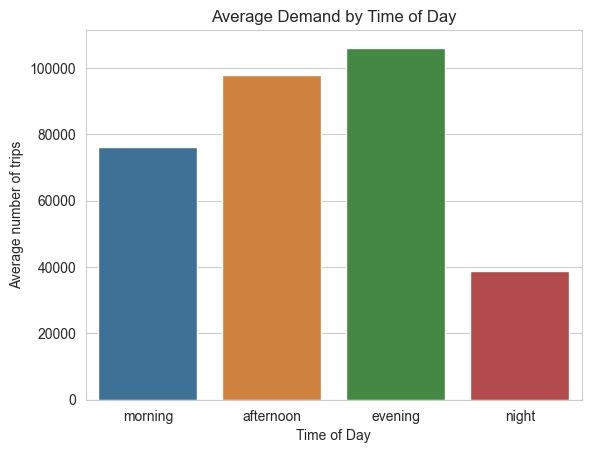

In [68]:
# create a seaborn barplot
sns.barplot(x='time_of_day', y='avg_demand', data=no_anomaly_Q2, saturation=0.6)

# sort the x-axis values by weekday
#plt.xticks(rotation=45)

# set the title
plt.title('Average Demand by Time of Day')

# set the x-axis label
plt.xlabel('Time of Day')

# set the y-axis label
plt.ylabel('Average number of trips')

#save the plot
plt.savefig('Average_Demand_Time.png')
# show the plot
plt.show()


In [69]:
no_anomaly_Q2["avg_demand"].describe().round(2)

count         4.00
mean      79658.67
std       30088.92
min       38683.42
25%       66771.01
50%       86944.85
75%       99832.51
max      106061.54
Name: avg_demand, dtype: float64

[Back to Table of Contents](#toc)<br>

### Question 3: <a class="anchor" id="que3"></a>
On average, how much revenue was generated in the weekdays 
and weekends for the business for the period covered in the 
dataset? 

In [70]:
no_anomaly_Q3 = df_no_anomaly.copy()
rev_df = df.copy()

In [71]:
# Create a new column for the time of day category
no_anomaly_Q3['Weekend'] = ''
rev_df['Weekend'] = ''




In [72]:

no_anomaly_Q3.loc[(no_anomaly_Q3['tpep_pickup_datetime'].dt.day >= 0) & (no_anomaly_Q3['tpep_pickup_datetime'].dt.day < 5), 'Weekend'] = 'Weekday'
no_anomaly_Q3.loc[(no_anomaly_Q3['tpep_pickup_datetime'].dt.day >= 5) & (no_anomaly_Q3['tpep_pickup_datetime'].dt.day< 7), 'Weekend'] = 'Weekend'


In [73]:
rev_df.loc[(rev_df['tpep_pickup_datetime'].dt.day >= 0) & (rev_df['tpep_pickup_datetime'].dt.day < 5), 'Weekend'] = 'Weekday'
rev_df.loc[(rev_df['tpep_pickup_datetime'].dt.day >= 5) & (rev_df['tpep_pickup_datetime'].dt.day< 7), 'Weekend'] = 'Weekend'

In [74]:
no_anomaly_Q3.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,day_of_week,time_of_day,Weekend
5,2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.980118,40.743050,1,False,-73.913490,...,0.5,0.5,0.0,0.0,0.3,20.3,18.500000,Friday,night,Weekday
7,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,False,-73.992035,...,0.5,0.5,0.0,0.0,0.3,10.3,11.900000,Friday,night,Weekday
8,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.00,-73.947151,40.791046,1,False,-73.920769,...,0.5,0.5,0.0,0.0,0.3,19.3,11.200000,Friday,night,Weekday
9,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,False,-73.995850,...,0.5,0.5,0.0,0.0,0.3,12.8,11.100000,Friday,night,Weekday
10,2,2016-01-01 00:00:03,2016-01-01 00:06:19,1,0.79,-74.006149,40.744919,1,False,-73.993797,...,0.5,0.5,0.0,0.0,0.3,7.3,6.266667,Friday,night,Weekday


In [75]:
weekday = no_anomaly_Q3.groupby('Weekend')['total_amount'].sum().loc['Weekday']
weekend = no_anomaly_Q3.groupby('Weekend')['total_amount'].sum().loc['Weekend']

In [76]:
print((weekday))
print((weekend))
print((weekday/weekend)*100)

12045616.84
6852764.44
175.77748287521757


In [77]:
weekday2 = rev_df.groupby('Weekend')['total_amount'].sum().loc['Weekday']
weekend2 = rev_df.groupby('Weekend')['total_amount'].sum().loc['Weekend']
print((weekday2))
print((weekend2))
print((weekday2/weekend2)*100)
print((weekday2+weekend2))
print(weekend2/(weekday2+weekend2))
print(weekday2 / (weekday2+weekend2))

12045616.84
6852764.44
175.77748287521757
18898381.28
0.3626111855014918
0.6373888144985081


In [78]:
no_anomaly_Q3["count"] = 1


In [79]:
# Convert the 'tpep_pickup_datetime' column to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract date and day of the week from the 'tpep_pickup_datetime' column
df['date'] = df['tpep_pickup_datetime'].dt.date
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Group by date and day_of_week, and calculate the sum of total_amount for each date
daily_total_revenue = df.groupby(['date', 'day_of_week'])['total_amount'].sum().reset_index()

# Group by day_of_week and calculate the mean total revenue
average_total_revenue_by_day = daily_total_revenue.groupby('day_of_week')['total_amount'].mean()

# Print the results
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
for day, avg_revenue in average_total_revenue_by_day.items():
    print(f"Average total revenue on {day_mapping[day]}: ${avg_revenue:.2f}")



Average total revenue on Monday: $3076817.31
Average total revenue on Tuesday: $3594671.33
Average total revenue on Wednesday: $3795748.56
Average total revenue on Thursday: $3956207.23
Average total revenue on Friday: $3999405.85
Average total revenue on Saturday: $3326319.73
Average total revenue on Sunday: $3001949.29


In [80]:


# Convert the 'tpep_pickup_datetime' column to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract date and day of the week from the 'tpep_pickup_datetime' column
df['date'] = df['tpep_pickup_datetime'].dt.date
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Group by date and day_of_week, and calculate the sum of total_amount for each date
daily_total_revenue = df.groupby(['date', 'day_of_week'])['total_amount'].sum().reset_index()

# Create a new column to identify if the day is a weekday (True) or weekend (False)
daily_total_revenue['is_weekday'] = daily_total_revenue['day_of_week'] < 5

# Group by is_weekday and calculate the mean total revenue
average_total_revenue_by_day_type = daily_total_revenue.groupby('is_weekday')['total_amount'].sum()

# Print the results
print("Average total revenue on weekdays: ${:.2f}".format(average_total_revenue_by_day_type.loc[True]))
print("Average total revenue on weekends: ${:.2f}".format(average_total_revenue_by_day_type.loc[False]))

Average total revenue on weekdays: $77690806.97
Average total revenue on weekends: $31641345.11


In [81]:
# Convert the 'tpep_pickup_datetime' column to datetime
no_anomaly_Q3['tpep_pickup_datetime'] = pd.to_datetime(no_anomaly_Q3['tpep_pickup_datetime'])

# Extract date and day of the week from the 'tpep_pickup_datetime' column
no_anomaly_Q3['date'] = no_anomaly_Q3['tpep_pickup_datetime'].dt.date
no_anomaly_Q3['day_of_week'] = no_anomaly_Q3['tpep_pickup_datetime'].dt.dayofweek

# Group by date and day_of_week, and calculate the sum of total_amount for each date
daily_total_revenue = no_anomaly_Q3.groupby(['date', 'day_of_week'])['total_amount'].sum().reset_index()

# Group by day_of_week and calculate the mean total revenue
average_total_revenue_by_day = daily_total_revenue.groupby('day_of_week')['total_amount'].mean()

# Print the results
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
for day, avg_revenue in average_total_revenue_by_day.items():
    print(f"Average total revenue on {day_mapping[day]}: ${avg_revenue:.2f}")

# summerize weekday and weekend
no_anomaly_Q3['Weekend'] = no_anomaly_Q3['Weekend'].astype('category')
no_anomaly_Q3['Weekend'].cat.set_categories(['Weekday', 'Weekend'], inplace=True)

# print average revenue of weekday and weekend
print("Average total revenue on weekdays: ${:.2f}".format(no_anomaly_Q3.groupby('Weekend')['total_amount'].sum().loc['Weekday']))
print("Average total revenue on weekends: ${:.2f}".format(no_anomaly_Q3.groupby('Weekend')['total_amount'].sum().loc['Weekend']))

Average total revenue on Monday: $3147941.74
Average total revenue on Tuesday: $3653698.41
Average total revenue on Wednesday: $3796933.55
Average total revenue on Thursday: $2955382.29
Average total revenue on Friday: $3932692.21
Average total revenue on Saturday: $3957606.10
Average total revenue on Sunday: $3360862.71
Average total revenue on weekdays: $12045616.84
Average total revenue on weekends: $6852764.44


c:\Users\krist\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:2747: FutureWarning:

The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.



In [82]:
result = no_anomaly_Q3[no_anomaly_Q3["tpep_dropoff_datetime"] == pd.to_datetime('2016-01-01')]

result["total_amount"].sum()

0.0

In [83]:
daily_total_revenue.head()

,date,day_of_week,total_amount
0,2016-01-01,4,3317797.17
1,2016-01-02,5,3005205.14
2,2016-01-03,6,2777416.58
3,2016-01-04,0,2945197.95
4,2016-01-05,1,3363210.82


In [84]:
# Assuming you have a DataFrame named df with columns 'tpep_pickup_datetime' and 'total_amount'
# df = pd.read_csv('your_data.csv')

# Convert the 'tpep_pickup_datetime' column to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract date and day of the week from the 'tpep_pickup_datetime' column
df['date'] = df['tpep_pickup_datetime'].dt.date
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Group by date and day_of_week, and calculate the sum of total_amount for each date
daily_total_revenue = df.groupby(['date', 'day_of_week'])['total_amount'].sum().reset_index()

# Create a new column to identify if the day is a weekday (True) or weekend (False)
daily_total_revenue['is_weekday'] = daily_total_revenue['day_of_week'] < 5

# Group by is_weekday and calculate the mean total revenue
average_total_revenue_by_day_type = daily_total_revenue.groupby('is_weekday')['total_amount'].mean()

# Print the results
print("Average total revenue on weekdays: ${:.2f}".format(average_total_revenue_by_day_type.loc[True]))
print("Average total revenue on weekends: ${:.2f}".format(average_total_revenue_by_day_type.loc[False]))

Average total revenue on weekdays: $3699562.24
Average total revenue on weekends: $3164134.51


In [131]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,day_of_week,time_of_day,date
5,2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.980118,40.743050,1,False,-73.913490,...,0.5,0.5,0.0,0.0,0.3,20.3,18.500000,4,night,2016-01-01
7,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,False,-73.992035,...,0.5,0.5,0.0,0.0,0.3,10.3,11.900000,4,night,2016-01-01
8,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.00,-73.947151,40.791046,1,False,-73.920769,...,0.5,0.5,0.0,0.0,0.3,19.3,11.200000,4,night,2016-01-01
9,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,False,-73.995850,...,0.5,0.5,0.0,0.0,0.3,12.8,11.100000,4,night,2016-01-01
10,2,2016-01-01 00:00:03,2016-01-01 00:06:19,1,0.79,-74.006149,40.744919,1,False,-73.993797,...,0.5,0.5,0.0,0.0,0.3,7.3,6.266667,4,night,2016-01-01


In [139]:
df['total_amount'].sum()
df['total_amount'].mean()
#total_average = df['total_amount'].groupby(['day_of_week']).sum()
grouped = df.groupby(['day_of_week'])
grouped['total_amount'].sum()

day_of_week
0    12307269.26
1    14378685.33
2    15182994.22
3    15824828.91
4    19997029.25
5    16631598.67
6    15009746.44
Name: total_amount, dtype: float64

In [151]:
weekday = df.groupby(df['day_of_week'] < 5)

weekday['total_amount'].sum()

day_of_week
False    11.453578
True     11.817088
Name: total_amount, dtype: float64

In [155]:
weekend = df.groupby(df['day_of_week'] > 4)

weekend['total_amount'].sum()

day_of_week
False    77690806.97
True     31641345.11
Name: total_amount, dtype: float64

In [158]:
df['total_amount'].sum()

109332152.07999994

In [161]:
weekday = 77690806.97
weekend = 31641345.11

total = weekday+weekend

print(weekday/weekend)


2.4553572770029435


[Back to Table of Contents](#toc)<br>

## Task B (50%): <a class="anchor" id="tb"></a>
Create a regression model to predict the total amount paid for taxiride, given the trip information in the dataset. 

Show that you know how to perform some exploratory, descriptive 
or correlation data analysis to select predictor variables that are 
highly influential. You can also combine variables, or create new 
ones by transforming and/or analysing the existing ones etc.  


In [85]:
super_clean_df = df_no_out[df_no_out['outlier_count'] <= 0]

In [86]:
super_duper_clean = detect_outliers_iqr(df[mod_cols_header]).copy()

C:\Users\krist\AppData\Local\Temp\ipykernel_12404\2433350462.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krist\AppData\Local\Temp\ipykernel_12404\2433350462.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
super_duper_clean_df = super_duper_clean[super_duper_clean['outlier_count'] <= 0]

In [88]:
super_duper_clean_df.value_counts('outlier_count')

outlier_count
0    7499569
dtype: int64

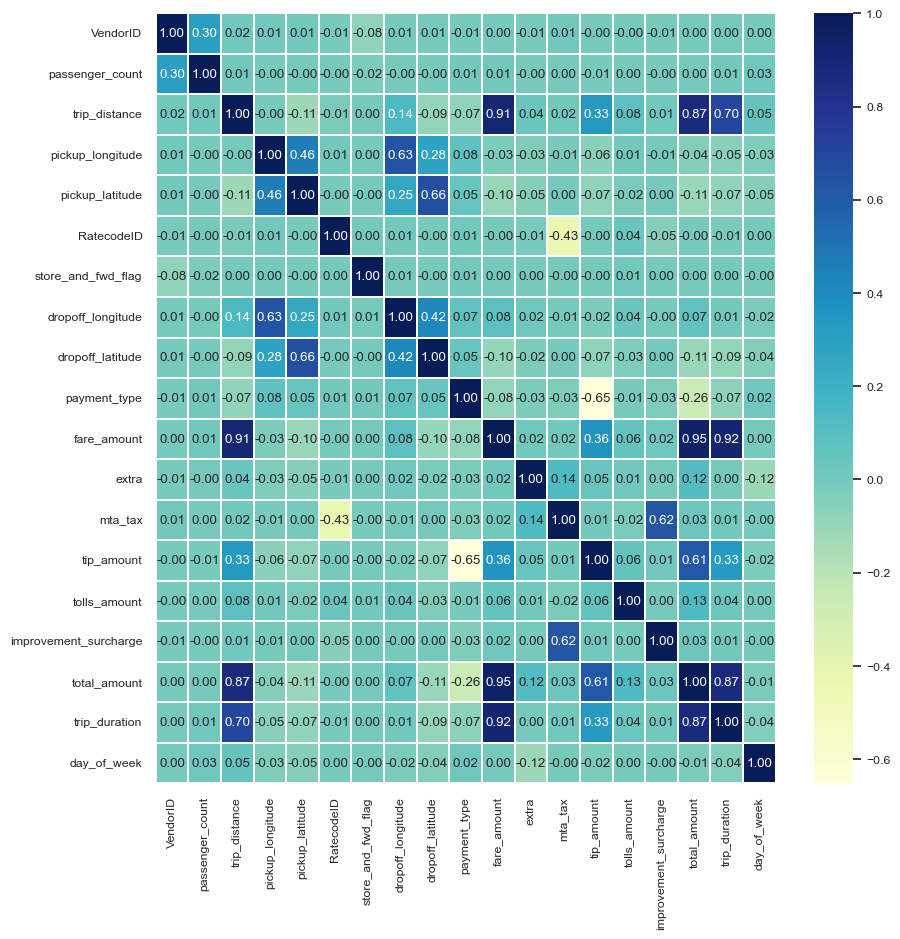

In [89]:
# check for correlation between the features
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

sns.set(font_scale=0.8)
# plot the correlation matrix

# Set the figure size
plt.figure(figsize=(10, 10))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,fmt= '.2f',cmap="YlGnBu",linewidths=0.1)

# save the correlation matrix to a file
plt.savefig('correlation_matrix.png',bbox_inches='tight')
plt.show()

In [90]:
# reduce the number of features to improve the performance of the model

# Create a new dataframe with the features to be used in the model
df_model = df[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']].copy()

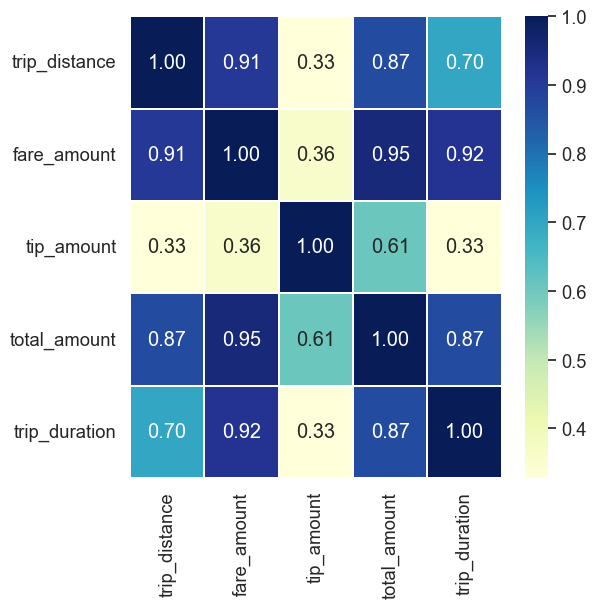

In [91]:
# check for correlation between the features
corr = df_model.corr()
corr.style.background_gradient(cmap='coolwarm')

sns.set(font_scale=1.2)
# plot the correlation matrix

# Set the figure size
plt.figure(figsize=(6, 6))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,fmt= '.2f',cmap="YlGnBu",linewidths=0.1)

# save the correlation matrix to a file
plt.savefig('correlation_matrix_reduced.png',bbox_inches='tight')
plt.show()

In [92]:
"""# creat a scatterplot matrix to visualize the correlation between the features
sns.pairplot(df_model, diag_kind='kde')

# save the scatterplot matrix to a file
plt.savefig('scatterplot_matrix.png',bbox_inches='tight')
plt.show()
"""

"# creat a scatterplot matrix to visualize the correlation between the features\nsns.pairplot(df_model, diag_kind='kde')\n\n# save the scatterplot matrix to a file\nplt.savefig('scatterplot_matrix.png',bbox_inches='tight')\nplt.show()\n"

In [93]:
"""
# Group the data by 'group_column' and calculate the mean of 'x_column' and 'y_column'
grouped_data = df.groupby('total_amount')[['tip_amount', 'fare_amount']].mean().reset_index()

# Create a scatter plot using the aggregated data
plt.scatter(grouped_data['tip_amount'], grouped_data['fare_amount'])

# Add labels and show the plot
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot with Aggregated Data')
plt.show()"""

"\n# Group the data by 'group_column' and calculate the mean of 'x_column' and 'y_column'\ngrouped_data = df.groupby('total_amount')[['tip_amount', 'fare_amount']].mean().reset_index()\n\n# Create a scatter plot using the aggregated data\nplt.scatter(grouped_data['tip_amount'], grouped_data['fare_amount'])\n\n# Add labels and show the plot\nplt.xlabel('X-axis Label')\nplt.ylabel('Y-axis Label')\nplt.title('Scatter Plot with Aggregated Data')\nplt.show()"

## Splitting data: <a class="anchor" id="spl"></a>
To begin, split (not randomly but sequentially) the data in the Main 
Sample file into two sets, such that the first 80% of the records in 
the file is used for fitting your regression model. While the last 20% 
is used for testing the model and reporting your prediction errors 
(e.g., RMSE) and R2 scores respectively. Note, you are not allowed to use the testing set in fitting your model. Also note that a simple 
model with good generalisation abilities is always preferable to 
complex one because simple model mostly perform better on 
previously unseen data. Remember to provide the equation for the 
finalised model in your report. 

In [94]:
# Select the features and target variable
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','trip_duration', 'fare_amount']
target = 'total_amount'

## Calculate the index where the split should occur
split_index = int(len(df) * 0.8)

# Split the dataset into training and testing sets sequentially
X_train = df[features].iloc[:split_index]
X_test = df[features].iloc[split_index:]
y_train = df[target].iloc[:split_index]
y_test = df[target].iloc[split_index:]

## Calculate the index where the split should occur
split_index2 = int(len(super_clean_df) * 0.8)

# Split the dataset into training and testing sets sequentially
X_train_clean = super_clean_df[features].iloc[:split_index2]
X_test_clean = super_clean_df[features].iloc[split_index2:]
y_train_clean = super_clean_df[target].iloc[:split_index2]
y_test_clean = super_clean_df[target].iloc[split_index2:]

## Calculate the index where the split should occur
split_index3 = int(len(super_duper_clean_df) * 0.8)
# Split the dataset into training and testing sets sequentially
X_train_clean2 = super_duper_clean_df[features].iloc[:split_index3]
X_test_clean2 = super_duper_clean_df[features].iloc[split_index3:]
y_train_clean2 = super_duper_clean_df[target].iloc[:split_index3]
y_test_clean2 = super_duper_clean_df[target].iloc[split_index3:]

[Back to Table of Contents](#toc)<br>

## Read new sample file

In [95]:
with open('New Sample.csv') as f:
    predict_df = pd.read_csv(f)


# Convert the pickup and dropoff datetimes to datetime datetime objects

predict_df['tpep_pickup_datetime'] = pd.to_datetime(predict_df['tpep_pickup_datetime'])
predict_df['tpep_dropoff_datetime'] = pd.to_datetime(predict_df['tpep_dropoff_datetime'])

# add an extra column for trip duration in minutes
predict_df['trip_duration'] = (predict_df['tpep_dropoff_datetime'] - predict_df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [96]:
# add the total amount column to the the prediction dataset
predict_df['total_amount'] = predict_df['fare_amount'] + predict_df['extra'] + predict_df['mta_tax'] + predict_df['tip_amount'] + predict_df['tolls_amount'] + predict_df['improvement_surcharge']

## Regression Analysis: <a class="anchor" id="reg"></a>
Once your model is finalised, predict the total amount paid on a trip 
for the trip records shown in New Sample file and tabulate the 
predicated values in your report, in the order the records are 
arranged in the file. I will compare these values with the actual ones 
in my possession for assessing the goodness of your model. 

### Polynomial Regression: <a class="anchor" id="pol"></a>

In [97]:

# Select the features and target variable
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'fare_amount']
target = 'total_amount'

# Define the degree of the polynomial
degree = 2

# Create the polynomial features transformer
poly_transformer = PolynomialFeatures(degree, include_bias=False)

# Create a linear regression model
linear_regression = LinearRegression()

# Create a pipeline that combines polynomial feature transformation and linear regression
poly_linear_regression = make_pipeline(poly_transformer, linear_regression)

# Fit the model on the training data
poly_linear_regression.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = poly_linear_regression.predict(X_test)

# Evaluate the model performance using R^2, MSE, and RMSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R^2 score:", r2)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)

R^2 score: 0.9142879492989656
Mean squared error: 1.9418082740601836
Root mean squared error: 1.393487809082011


In [98]:
poly_predict_df = predict_df.copy()
# Make sure the new dataset has the same features as the original dataset
polynomial_features = poly_predict_df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','trip_duration', 'fare_amount']]

# Make predictions on the new dataset
polynomial_predictions = poly_linear_regression.predict(polynomial_features)

# Add the predictions as a new column to the new dataset
poly_predict_df['predicted_total_amount'] = polynomial_predictions

In [99]:
# Calculate R-squared score
r2 = r2_score(poly_predict_df['total_amount'], polynomial_predictions)
print(f'R-squared score: {r2}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(poly_predict_df['total_amount'], polynomial_predictions)
print(f'Mean Squared Error: {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R-squared score: -32192264.344123766
Mean Squared Error: 5087930967.780485
Root Mean Squared Error: 71329.73410703622


In [100]:
poly_predict_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,trip_duration,total_amount,predicted_total_amount
0,2,2016-02-25 17:24:00,2016-02-25 17:27:00,2,0.70,-73.947250,40.763771,1,N,-73.992012,...,2,5.0,0.0,0.5,0.0,0.0,0.3,3.0,5.8,6.799490
1,2,2016-02-25 23:10:00,2016-02-25 23:31:00,2,5.52,-73.983017,40.750992,1,N,-73.988586,...,2,20.0,0.5,0.5,0.0,0.0,0.3,21.0,21.3,23.915948
2,2,2016-02-01 00:00:00,2016-02-01 00:10:00,6,1.99,-73.992340,40.758202,1,N,-73.964355,...,1,9.5,0.5,0.5,0.7,0.0,0.3,10.0,11.5,12.034092
3,1,2016-02-01 00:00:00,2016-02-01 00:05:00,1,1.50,-73.981453,40.749722,1,N,-73.982323,...,2,6.5,0.5,0.5,0.0,0.0,0.3,5.0,7.8,8.605012
4,2,2016-02-01 00:00:00,2016-02-01 00:20:00,1,5.60,-74.000603,40.729755,1,N,-73.951324,...,1,20.0,0.5,0.5,4.0,0.0,0.3,20.0,25.3,24.763432


In [101]:
# Define the degree of the polynomial
degree = 2

# Create the polynomial features transformer
poly_transformer = PolynomialFeatures(degree, include_bias=False)

# Create a linear regression model
linear_regression = LinearRegression()

# Create a pipeline that combines polynomial feature transformation and linear regression
poly_linear_regression = make_pipeline(poly_transformer, linear_regression)

# Fit the model on the training data
poly_linear_regression.fit(X_train_clean, y_train_clean)

# Predict the target variable for the test data
y_pred_clean = poly_linear_regression.predict(X_test_clean)

# Evaluate the model performance using R^2, MSE, and RMSE
r2 = r2_score(y_test_clean, y_pred_clean)
mse = mean_squared_error(y_test_clean, y_pred_clean)
rmse = np.sqrt(mse)

print("R^2 score:", r2)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)

R^2 score: 0.9376654786191644
Mean squared error: 1.37727385327765
Root mean squared error: 1.17357311373329


In [102]:
poly_predict_df = predict_df.copy()
# Make sure the new dataset has the same features as the original dataset
polynomial_features = poly_predict_df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','trip_duration', 'fare_amount']]

# Make predictions on the new dataset
polynomial_predictions = poly_linear_regression.predict(polynomial_features)

# Add the predictions as a new column to the new dataset
poly_predict_df['predicted_total_amount'] = polynomial_predictions

# Calculate R-squared score
r2 = r2_score(poly_predict_df['total_amount'], polynomial_predictions)
print(f'R-squared score: {r2}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(poly_predict_df['total_amount'], polynomial_predictions)
print(f'Mean Squared Error: {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R-squared score: -18384790.83384465
Mean Squared Error: 2905684042.663697
Root Mean Squared Error: 53904.39724793977


In [103]:
poly_predict_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,trip_duration,total_amount,predicted_total_amount
0,2,2016-02-25 17:24:00,2016-02-25 17:27:00,2,0.70,-73.947250,40.763771,1,N,-73.992012,...,2,5.0,0.0,0.5,0.0,0.0,0.3,3.0,5.8,6.860256
1,2,2016-02-25 23:10:00,2016-02-25 23:31:00,2,5.52,-73.983017,40.750992,1,N,-73.988586,...,2,20.0,0.5,0.5,0.0,0.0,0.3,21.0,21.3,23.573616
2,2,2016-02-01 00:00:00,2016-02-01 00:10:00,6,1.99,-73.992340,40.758202,1,N,-73.964355,...,1,9.5,0.5,0.5,0.7,0.0,0.3,10.0,11.5,12.010005
3,1,2016-02-01 00:00:00,2016-02-01 00:05:00,1,1.50,-73.981453,40.749722,1,N,-73.982323,...,2,6.5,0.5,0.5,0.0,0.0,0.3,5.0,7.8,8.611407
4,2,2016-02-01 00:00:00,2016-02-01 00:20:00,1,5.60,-74.000603,40.729755,1,N,-73.951324,...,1,20.0,0.5,0.5,4.0,0.0,0.3,20.0,25.3,24.217947


In [104]:
# Define the degree of the polynomial
degree = 2

# Create the polynomial features transformer
poly_transformer = PolynomialFeatures(degree, include_bias=False)

# Create a linear regression model
linear_regression = LinearRegression()

# Create a pipeline that combines polynomial feature transformation and linear regression
poly_linear_regression = make_pipeline(poly_transformer, linear_regression)

# Fit the model on the training data
poly_linear_regression.fit(X_train_clean2, y_train_clean2)

# Predict the target variable for the test data
y_pred_clean = poly_linear_regression.predict(X_test_clean2)

# Evaluate the model performance using R^2, MSE, and RMSE
r2 = r2_score(y_test_clean2, y_pred_clean)
mse = mean_squared_error(y_test_clean2, y_pred_clean)
rmse = np.sqrt(mse)

print("R^2 score:", r2)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)

R^2 score: 0.9199002457310421
Mean squared error: 1.2271348217507232
Root mean squared error: 1.107761175412247


### Linear regression: <a class="anchor" id="lin"></a>

In [105]:
from sklearn.linear_model import LinearRegression

# Select the features and target variable
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration','fare_amount']
target = 'total_amount'

# Create a linear regression model
linear_regression = LinearRegression()

# Fit the model on the training data
linear_regression.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = linear_regression.predict(X_test)

# Evaluate the model performance using R^2, MSE, and RMSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R^2 score:", r2)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)

R^2 score: 0.9139942100745623
Mean squared error: 1.9484629422392485
Root mean squared error: 1.3958735409195377


In [106]:
lin_predict_df = predict_df.copy()
# Make sure the new dataset has the same features as the original dataset
linear_features = lin_predict_df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','trip_duration','fare_amount']]

# Make predictions on the new dataset
linear_predictions = linear_regression.predict(linear_features)

# Add the predictions as a new column to the new dataset
lin_predict_df['predicted_total_amount'] = linear_predictions

# Calculate R-squared score
r2 = r2_score(lin_predict_df['total_amount'], linear_predictions)
print(f'R-squared score: {r2}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(lin_predict_df['total_amount'], linear_predictions)
print(f'Mean Squared Error: {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R-squared score: -13.117544115632791
Mean Squared Error: 2231.2530394213654
Root Mean Squared Error: 47.23614124186443


In [107]:
# Select the features and target variable
features_2 = ['trip_duration', 'fare_amount']
target = 'total_amount'

## Calculate the index where the split should occur
split_index = int(len(df) * 0.8)

# Split the dataset into training and testing sets sequentially
X_train2 = df[features_2].iloc[:split_index]
X_test2 = df[features_2].iloc[split_index:]
y_train2 = df[target].iloc[:split_index]
y_test2 = df[target].iloc[split_index:]

In [108]:
# Create a linear regression model
linear_regression = LinearRegression()

# Fit the model on the training data
linear_regression.fit(X_train2, y_train2)


# Predict the target variable for the test data
y_pred2 = linear_regression.predict(X_test2)

# Evaluate the model performance using R^2, MSE, and RMSE
r2 = r2_score(y_test2, y_pred2)
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)

print("R^2 score:", r2)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)

R^2 score: 0.9134359289360298
Mean squared error: 1.9611108129317294
Root mean squared error: 1.4003966627108655


In [109]:
lin_predict_df.head(50)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,trip_duration,total_amount,predicted_total_amount
0,2,2016-02-25 17:24:00,2016-02-25 17:27:00,2,0.70,-73.947250,40.763771,1,N,-73.992012,...,2,5.0,0.0,0.5,0.00,0.00,0.3,3.0,5.80,6.777398
1,2,2016-02-25 23:10:00,2016-02-25 23:31:00,2,5.52,-73.983017,40.750992,1,N,-73.988586,...,2,20.0,0.5,0.5,0.00,0.00,0.3,21.0,21.30,23.886716
2,2,2016-02-01 00:00:00,2016-02-01 00:10:00,6,1.99,-73.992340,40.758202,1,N,-73.964355,...,1,9.5,0.5,0.5,0.70,0.00,0.3,10.0,11.50,12.022314
3,1,2016-02-01 00:00:00,2016-02-01 00:05:00,1,1.50,-73.981453,40.749722,1,N,-73.982323,...,2,6.5,0.5,0.5,0.00,0.00,0.3,5.0,7.80,8.569102
4,2,2016-02-01 00:00:00,2016-02-01 00:20:00,1,5.60,-74.000603,40.729755,1,N,-73.951324,...,1,20.0,0.5,0.5,4.00,0.00,0.3,20.0,25.30,24.195270
5,2,2016-02-01 00:00:00,2016-02-01 00:15:00,1,4.69,-74.005104,40.719006,1,N,-73.947090,...,2,16.0,0.5,0.5,0.00,0.00,0.3,15.0,17.30,19.648686
6,2,2016-02-01 00:00:00,2016-02-01 00:05:00,1,1.45,-73.986000,40.762146,1,N,-73.990608,...,1,6.5,0.5,0.5,1.56,0.00,0.3,5.0,9.36,8.615226
7,2,2016-02-01 00:00:00,2016-02-01 00:06:00,1,1.10,-73.966331,40.773422,1,N,-73.956108,...,2,6.5,0.5,0.5,0.00,0.00,0.3,6.0,7.80,8.474787
8,2,2016-02-01 00:00:00,2016-02-01 00:06:00,1,1.96,-73.976555,40.765697,1,N,-73.978973,...,1,7.5,0.5,0.5,1.00,0.00,0.3,6.0,9.80,9.725722
9,2,2016-02-01 00:00:00,2016-02-01 00:16:00,2,4.50,-73.976585,40.764931,1,N,-73.911118,...,2,16.0,0.5,0.5,0.00,0.00,0.3,16.0,17.30,19.373302


### Linear regression simple: <a class="anchor" id="lin"></a>

In [110]:
# Select the features and target variable
features_2 = ['trip_duration', 'fare_amount']
target = 'total_amount'

## Calculate the index where the split should occur
split_index = int(len(df) * 0.8)

# Split the dataset into training and testing sets sequentially
X_train2 = df[features_2].iloc[:split_index]
X_test2 = df[features_2].iloc[split_index:]
y_train2 = df[target].iloc[:split_index]
y_test2 = df[target].iloc[split_index:]

In [111]:
# Create a linear regression model
linear_regression = LinearRegression()

# Fit the model on the training data
linear_regression.fit(X_train2, y_train2)


# Predict the target variable for the test data
y_pred2 = linear_regression.predict(X_test2)

# Evaluate the model performance using R^2, MSE, and RMSE
r2 = r2_score(y_test2, y_pred2)
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)

print("R^2 score:", r2)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)

R^2 score: 0.9134359289360298
Mean squared error: 1.9611108129317294
Root mean squared error: 1.4003966627108655


In [112]:
"""# Evaluate the model performance using R^2, MSE, and RMSE
r2 = r2_score(y_test2, y_pred2)
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)

print("R^2 score:", r2)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot scatter plot for trip_duration
axes[0].scatter(X_train2['trip_duration'], y_train2, label='Training data', color='red', alpha=0.5)
axes[0].scatter(X_test2['trip_duration'], y_test2, label='Test data', color='green', alpha=0.5)
axes[0].set_title('Trip Duration vs Total Amount')
axes[0].set_xlabel('Trip Duration')
axes[0].set_ylabel('Total Amount')
axes[0].legend()

# Plot scatter plot for fare_amount
axes[1].scatter(X_train2['fare_amount'], y_train2, label='Training data', color='red', alpha=0.5)
axes[1].scatter(X_test2['fare_amount'], y_test2, label='Test data', color='green', alpha=0.5)
axes[1].set_title('Fare Amount vs Total Amount')
axes[1].set_xlabel('Fare Amount')
axes[1].set_ylabel('Total Amount')
axes[1].legend()

plt.show()"""

'# Evaluate the model performance using R^2, MSE, and RMSE\nr2 = r2_score(y_test2, y_pred2)\nmse = mean_squared_error(y_test2, y_pred2)\nrmse = np.sqrt(mse)\n\nprint("R^2 score:", r2)\nprint("Mean squared error:", mse)\nprint("Root mean squared error:", rmse)\n\n# Plot the results\nfig, axes = plt.subplots(1, 2, figsize=(20, 6))\n\n# Plot scatter plot for trip_duration\naxes[0].scatter(X_train2[\'trip_duration\'], y_train2, label=\'Training data\', color=\'red\', alpha=0.5)\naxes[0].scatter(X_test2[\'trip_duration\'], y_test2, label=\'Test data\', color=\'green\', alpha=0.5)\naxes[0].set_title(\'Trip Duration vs Total Amount\')\naxes[0].set_xlabel(\'Trip Duration\')\naxes[0].set_ylabel(\'Total Amount\')\naxes[0].legend()\n\n# Plot scatter plot for fare_amount\naxes[1].scatter(X_train2[\'fare_amount\'], y_train2, label=\'Training data\', color=\'red\', alpha=0.5)\naxes[1].scatter(X_test2[\'fare_amount\'], y_test2, label=\'Test data\', color=\'green\', alpha=0.5)\naxes[1].set_title(\'Far

### Linear regression super clean dataset: <a class="anchor" id="lin"></a>

In [113]:
super_clean_df = df_no_out[df_no_out['outlier_count'] <= 0]

In [114]:
super_clean_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,outlier,outlier_count
0,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8,0.000000,,0
4,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8,0.000000,,0
7,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,-73.992035,40.753944,2,9.0,0.5,0.5,0.0,0.0,0.3,10.3,11.900000,,0
9,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,-73.995850,40.688400,2,11.5,0.5,0.5,0.0,0.0,0.3,12.8,11.100000,,0
10,2016-01-01 00:00:03,2016-01-01 00:06:19,1,0.79,-74.006149,40.744919,1,-73.993797,40.741440,2,6.0,0.5,0.5,0.0,0.0,0.3,7.3,6.266667,,0


In [115]:
# Select the features and target variable
features_3 = ['trip_duration', 'fare_amount']
target = 'total_amount'

## Calculate the index where the split should occur
split_index = int(len(super_clean_df) * 0.8)

# Split the dataset into training and testing sets sequentially
X_train3 = super_clean_df[features_3].iloc[:split_index]
X_test3 = super_clean_df[features_3].iloc[split_index:]
y_train3 = super_clean_df[target].iloc[:split_index]
y_test3 = super_clean_df[target].iloc[split_index:]

# Create a linear regression model
linear_regression = LinearRegression()

# Fit the model on the training data
linear_regression.fit(X_train3, y_train3)


# Predict the target variable for the test data
y_pred3 = linear_regression.predict(X_test3)


# Evaluate the model performance using R^2, MSE, and RMSE
r2 = r2_score(y_test3, y_pred3)
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)

print("R^2 score:", r2)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
#R^2 score: 0.9370857843081849
#Mean squared error: 1.3900821302920507
#Root mean squared error: 1.1790174427429183

R^2 score: 0.9370857843081849
Mean squared error: 1.3900821302920507
Root mean squared error: 1.1790174427429183


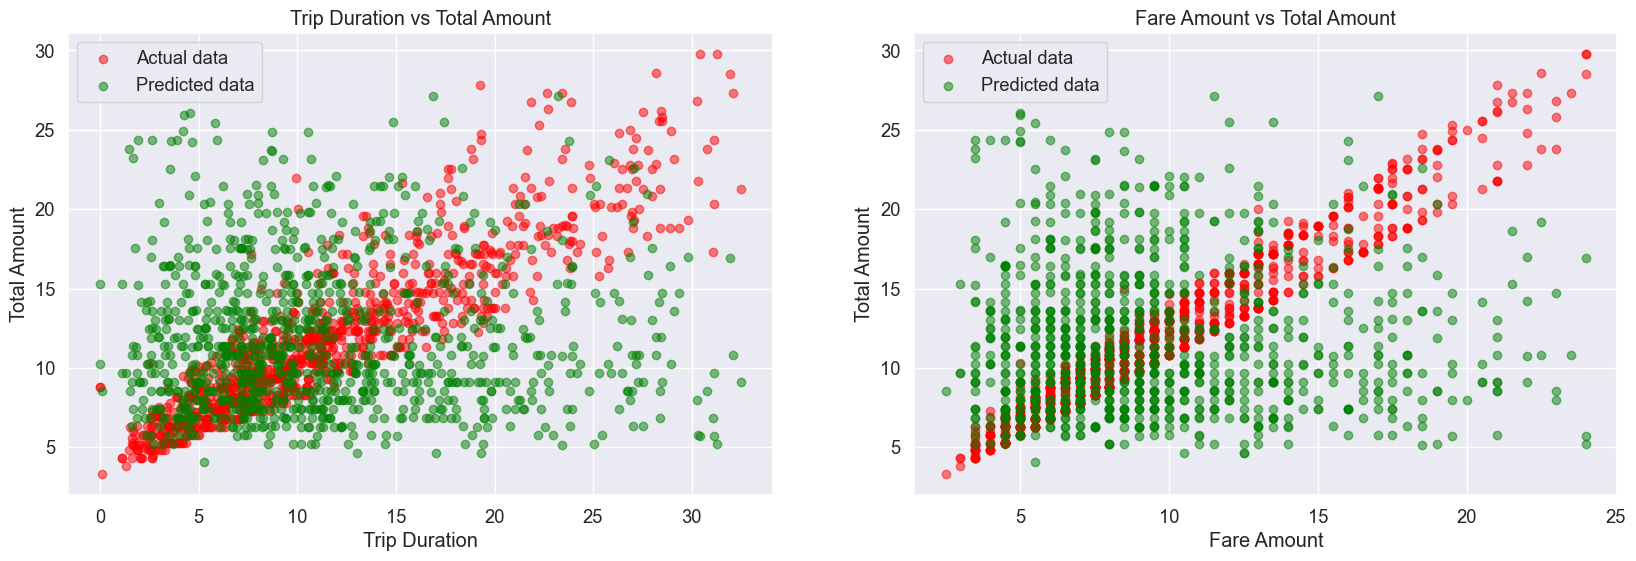

In [116]:
# Select the first 100 rows of the DataFrame and predictions array
sample_df = super_clean_df.head(1000)
linear_sample_predictions = y_pred3[:1000]

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot scatter plot for trip_duration
axes[0].scatter(sample_df['trip_duration'], sample_df['total_amount'], label='Actual data', color='red', alpha=0.5)
axes[0].scatter(sample_df['trip_duration'], linear_sample_predictions, label='Predicted data', color='green', alpha=0.5)
axes[0].set_title('Trip Duration vs Total Amount')
axes[0].set_xlabel('Trip Duration')
axes[0].set_ylabel('Total Amount')
axes[0].legend()

# Plot scatter plot for fare_amount
axes[1].scatter(sample_df['fare_amount'], sample_df['total_amount'], label='Actual data', color='red', alpha=0.5)
axes[1].scatter(sample_df['fare_amount'], linear_sample_predictions, label='Predicted data', color='green', alpha=0.5)
axes[1].set_title('Fare Amount vs Total Amount')
axes[1].set_xlabel('Fare Amount')
axes[1].set_ylabel('Total Amount')
axes[1].legend()

plt.show()


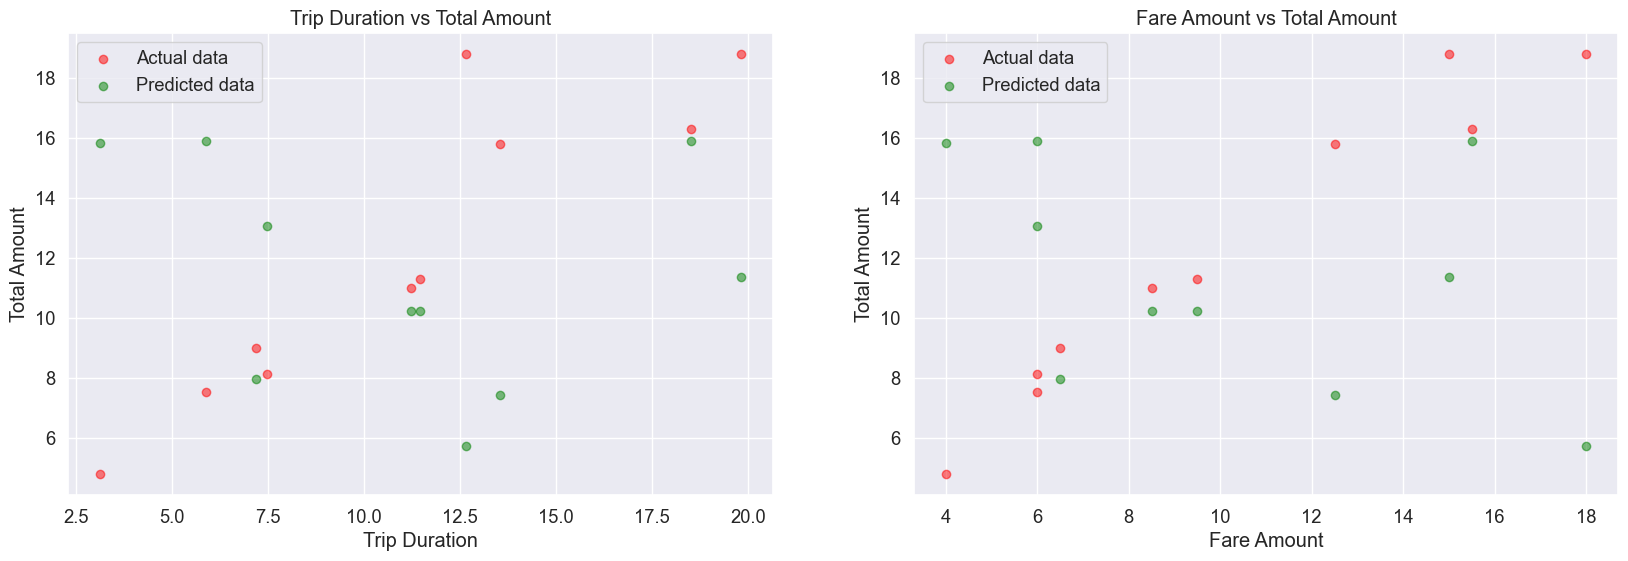

In [117]:
import numpy as np

# Get the minimum length of the DataFrame and predictions array
min_length = min(len(super_clean_df), len(y_pred3))

# Get a random sample of 100 rows, limited by the minimum length
sample_index = np.random.choice(np.arange(min_length), size=10, replace=False)
sample_df = super_clean_df.iloc[sample_index]
linear_sample_predictions = y_pred3[sample_index]

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot scatter plot for trip_duration
axes[0].scatter(sample_df['trip_duration'], sample_df['total_amount'], label='Actual data', color='red', alpha=0.5)
axes[0].scatter(sample_df['trip_duration'], linear_sample_predictions, label='Predicted data', color='green', alpha=0.5)
axes[0].set_title('Trip Duration vs Total Amount')
axes[0].set_xlabel('Trip Duration')
axes[0].set_ylabel('Total Amount')
axes[0].legend()

# Plot scatter plot for fare_amount
axes[1].scatter(sample_df['fare_amount'], sample_df['total_amount'], label='Actual data', color='red', alpha=0.5)
axes[1].scatter(sample_df['fare_amount'], linear_sample_predictions, label='Predicted data', color='green', alpha=0.5)
axes[1].set_title('Fare Amount vs Total Amount')
axes[1].set_xlabel('Fare Amount')
axes[1].set_ylabel('Total Amount')
axes[1].legend()

plt.show()


In [118]:
lin_predict_df = predict_df.copy()
# Make sure the new dataset has the same features as the original dataset
linear_features = lin_predict_df[['trip_duration','fare_amount']]

# Make predictions on the new dataset
linear_predictions = linear_regression.predict(linear_features)

# Add the predictions as a new column to the new dataset
lin_predict_df['predicted_total_amount'] = linear_predictions

# Calculate R-squared score
r2 = r2_score(lin_predict_df['total_amount'], linear_predictions)
print(f'R-squared score: {r2}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(lin_predict_df['total_amount'], linear_predictions)
print(f'Mean Squared Error: {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

#R-squared score: 0.9824246773843848
#Mean Squared Error: 2.7777488551623266
#Root Mean Squared Error: 1.6666579898594451

R-squared score: 0.9824246773843848
Mean Squared Error: 2.7777488551623266
Root Mean Squared Error: 1.6666579898594451


In [119]:
lin_predict_df.head(50)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,trip_duration,total_amount,predicted_total_amount
0,2,2016-02-25 17:24:00,2016-02-25 17:27:00,2,0.70,-73.947250,40.763771,1,N,-73.992012,...,2,5.0,0.0,0.5,0.00,0.00,0.3,3.0,5.80,6.885118
1,2,2016-02-25 23:10:00,2016-02-25 23:31:00,2,5.52,-73.983017,40.750992,1,N,-73.988586,...,2,20.0,0.5,0.5,0.00,0.00,0.3,21.0,21.30,23.820878
2,2,2016-02-01 00:00:00,2016-02-01 00:10:00,6,1.99,-73.992340,40.758202,1,N,-73.964355,...,1,9.5,0.5,0.5,0.70,0.00,0.3,10.0,11.50,11.944546
3,1,2016-02-01 00:00:00,2016-02-01 00:05:00,1,1.50,-73.981453,40.749722,1,N,-73.982323,...,2,6.5,0.5,0.5,0.00,0.00,0.3,5.0,7.80,8.576032
4,2,2016-02-01 00:00:00,2016-02-01 00:20:00,1,5.60,-74.000603,40.729755,1,N,-73.951324,...,1,20.0,0.5,0.5,4.00,0.00,0.3,20.0,25.30,23.834190
5,2,2016-02-01 00:00:00,2016-02-01 00:15:00,1,4.69,-74.005104,40.719006,1,N,-73.947090,...,2,16.0,0.5,0.5,0.00,0.00,0.3,15.0,17.30,19.320650
6,2,2016-02-01 00:00:00,2016-02-01 00:05:00,1,1.45,-73.986000,40.762146,1,N,-73.990608,...,1,6.5,0.5,0.5,1.56,0.00,0.3,5.0,9.36,8.576032
7,2,2016-02-01 00:00:00,2016-02-01 00:06:00,1,1.10,-73.966331,40.773422,1,N,-73.956108,...,2,6.5,0.5,0.5,0.00,0.00,0.3,6.0,7.80,8.562719
8,2,2016-02-01 00:00:00,2016-02-01 00:06:00,1,1.96,-73.976555,40.765697,1,N,-73.978973,...,1,7.5,0.5,0.5,1.00,0.00,0.3,6.0,9.80,9.707745
9,2,2016-02-01 00:00:00,2016-02-01 00:16:00,2,4.50,-73.976585,40.764931,1,N,-73.911118,...,2,16.0,0.5,0.5,0.00,0.00,0.3,16.0,17.30,19.307338


In [120]:
# save csv file
lin_predict_df.to_csv('linear_predictions.csv', index=False)

In [121]:
# Select the columns 'total_amount' and 'predicted_total_amount'
selected_columns_df = lin_predict_df[['total_amount', 'predicted_total_amount']]

# Convert the selected columns to a LaTeX table
latex_table = selected_columns_df.to_latex(index=True, escape=False, float_format="%.2f", column_format='l')

# Print the LaTeX table
print(latex_table)

\begin{tabular}{l}
\toprule
{} &  total_amount &  predicted_total_amount \\
\midrule
0  &          5.80 &                    6.89 \\
1  &         21.30 &                   23.82 \\
2  &         11.50 &                   11.94 \\
3  &          7.80 &                    8.58 \\
4  &         25.30 &                   23.83 \\
5  &         17.30 &                   19.32 \\
6  &          9.36 &                    8.58 \\
7  &          7.80 &                    8.56 \\
8  &          9.80 &                    9.71 \\
9  &         17.30 &                   19.31 \\
10 &         11.76 &                   10.84 \\
11 &         17.30 &                   19.29 \\
12 &          9.00 &                    8.56 \\
13 &         18.00 &                   18.18 \\
14 &         12.36 &                   11.39 \\
15 &          6.96 &                    6.33 \\
16 &         20.16 &                   18.73 \\
17 &         21.96 &                   20.44 \\
18 &         36.34 &                   34.74 \\
19 

C:\Users\krist\AppData\Local\Temp\ipykernel_12404\733661580.py:5: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



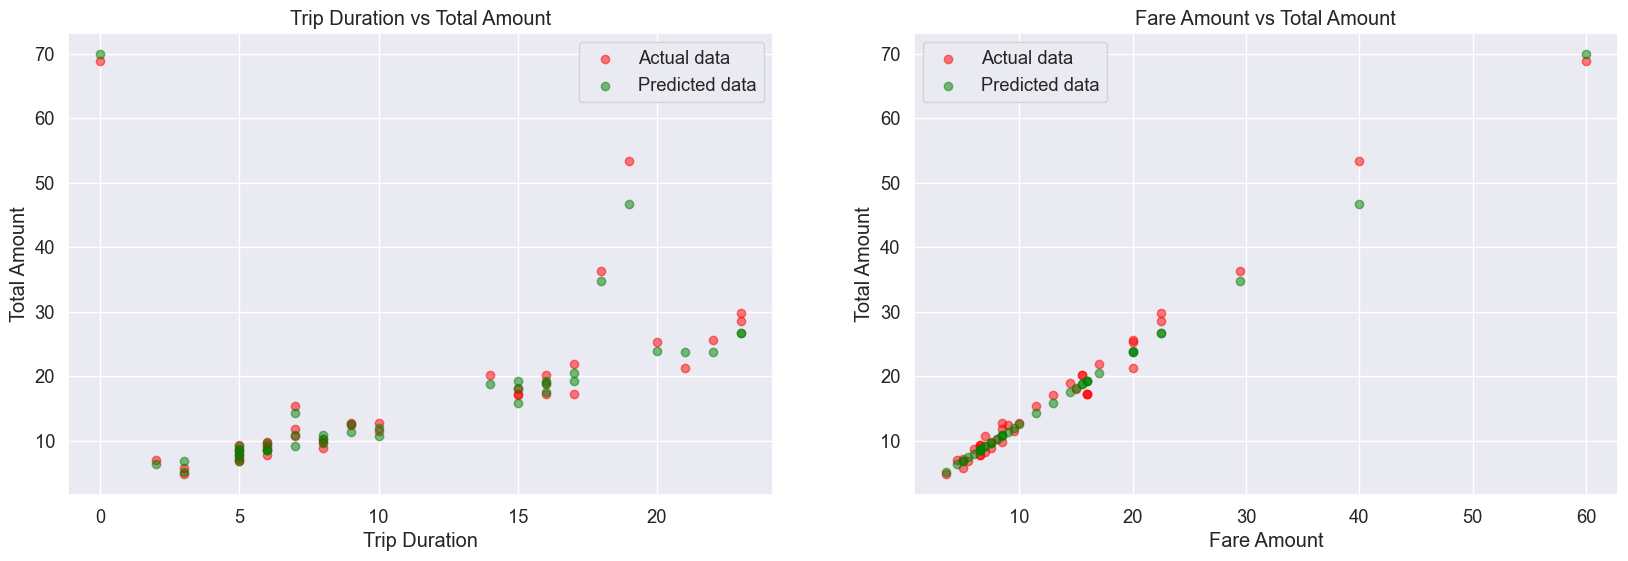

In [122]:

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot scatter plot for trip_duration
axes[0].scatter(lin_predict_df['trip_duration'], lin_predict_df['total_amount'], label='Actual data', color='red', alpha=0.5)
axes[0].scatter(lin_predict_df['trip_duration'], linear_predictions, label='Predicted data', color='green', alpha=0.5)
axes[0].set_title('Trip Duration vs Total Amount')
axes[0].set_xlabel('Trip Duration')
axes[0].set_ylabel('Total Amount')
axes[0].legend()

# Plot scatter plot for fare_amount
axes[1].scatter(lin_predict_df['fare_amount'], lin_predict_df['total_amount'], label='Actual data', color='red', alpha=0.5)
axes[1].scatter(lin_predict_df['fare_amount'], linear_predictions, label='Predicted data', color='green', alpha=0.5)
axes[1].set_title('Fare Amount vs Total Amount')
axes[1].set_xlabel('Fare Amount')
axes[1].set_ylabel('Total Amount')
axes[1].legend()

plt.show()

In [123]:
# Select the features and target variable
features_3 = ['trip_duration', 'fare_amount']
## Calculate the index where the split should occur
split_index3 = int(len(super_duper_clean_df) * 0.8)
# Split the dataset into training and testing sets sequentially
X_train_clean2 = super_duper_clean_df[features_3].iloc[:split_index3]
X_test_clean2 = super_duper_clean_df[features_3].iloc[split_index3:]
y_train_clean2 = super_duper_clean_df[target].iloc[:split_index3]
y_test_clean2 = super_duper_clean_df[target].iloc[split_index3:]


# Create a linear regression model
linear_regression = LinearRegression()

# Fit the model on the training data
linear_regression.fit(X_train_clean2, y_train_clean2)


# Predict the target variable for the test data
y_pred3 = linear_regression.predict(X_test_clean2)


# Evaluate the model performance using R^2, MSE, and RMSE
r2 = r2_score(y_test_clean2, y_pred3)
mse = mean_squared_error(y_test_clean2, y_pred3)
rmse = np.sqrt(mse)

print("R^2 score:", r2)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)



R^2 score: 0.9191219924174934
Mean squared error: 1.2390577265076061
Root mean squared error: 1.1131296988705341


In [124]:
# save to csv
lin_predict_df.to_csv('linear_predictions.csv')

In [125]:
# Select the features and target variable
features_4 = ['fare_amount']
target = 'total_amount'

## Calculate the index where the split should occur
split_index = int(len(super_clean_df) * 0.8)

# Split the dataset into training and testing sets sequentially
X_train4 = super_clean_df[features_4].iloc[:split_index]
X_test4 = super_clean_df[features_4].iloc[split_index:]
y_train4 = super_clean_df[target].iloc[:split_index]
y_test4 = super_clean_df[target].iloc[split_index:]

# Create a linear regression model
linear_regression = LinearRegression()

# Fit the model on the training data
linear_regression.fit(X_train4, y_train4)


# Predict the target variable for the test data
y_pred4 = linear_regression.predict(X_test4)


# Evaluate the model performance using R^2, MSE, and RMSE
r2 = r2_score(y_test4, y_pred4)
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)

print("R^2 score:", r2)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)

R^2 score: 0.9369901156230229
Mean squared error: 1.392195918538631
Root mean squared error: 1.1799135216356456


In [126]:
# Select the features and target variable
features_4 = ['trip_duration','trip_distance']
target = 'total_amount'

## Calculate the index where the split should occur
split_index = int(len(super_clean_df) * 0.8)

# Split the dataset into training and testing sets sequentially
X_train4 = super_clean_df[features_4].iloc[:split_index]
X_test4 = super_clean_df[features_4].iloc[split_index:]
y_train4 = super_clean_df[target].iloc[:split_index]
y_test4 = super_clean_df[target].iloc[split_index:]

# Create a linear regression model
linear_regression = LinearRegression()

# Fit the model on the training data
linear_regression.fit(X_train4, y_train4)


# Predict the target variable for the test data
y_pred4 = linear_regression.predict(X_test4)


# Evaluate the model performance using R^2, MSE, and RMSE
r2 = r2_score(y_test4, y_pred4)
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)

print("R^2 score:", r2)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)

R^2 score: 0.9284893881833576
Mean squared error: 1.580018482619319
Root mean squared error: 1.256987860967368


In [127]:
sim_predict_df = predict_df.copy()
# Make sure the new dataset has the same features as the original dataset
linear_features = sim_predict_df[['fare_amount']]

# Make predictions on the new dataset
linear_predictions = linear_regression.predict(linear_features)

# Add the predictions as a new column to the new dataset
sim_predict_df['predicted_total_amount'] = linear_predictions

c:\Users\krist\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- fare_amount
Feature names seen at fit time, yet now missing:
- trip_distance
- trip_duration




ValueError: X has 1 features, but LinearRegression is expecting 2 features as input.

2023-03-31 12:07:54,433 - INFO     - Executing shutdown due to inactivity...
2023-03-31 12:08:06,668 - INFO     - Executing shutdown...
c:\Users\krist\anaconda3\lib\site-packages\dtale\app.py:422: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



In [ ]:
# Calculate R-squared score
r2 = r2_score(sim_predict_df['total_amount'], linear_predictions)
print(f'R-squared score: {r2}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(sim_predict_df['total_amount'], linear_predictions)
print(f'Mean Squared Error: {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R-squared score: 0.9812736379137341
Mean Squared Error: 2.959668620834546
Root Mean Squared Error: 1.7203687455991945


In [ ]:
sim_predict_df.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,trip_duration,total_amount,predicted_total_amount
0,2,2016-02-25 17:24:00,2016-02-25 17:27:00,2,0.70,-73.947250,40.763771,1,N,-73.992012,...,2,5.0,0.0,0.5,0.00,0.00,0.3,3.0,5.80,6.863466
1,2,2016-02-25 23:10:00,2016-02-25 23:31:00,2,5.52,-73.983017,40.750992,1,N,-73.988586,...,2,20.0,0.5,0.5,0.00,0.00,0.3,21.0,21.30,23.756370
2,2,2016-02-01 00:00:00,2016-02-01 00:10:00,6,1.99,-73.992340,40.758202,1,N,-73.964355,...,1,9.5,0.5,0.5,0.70,0.00,0.3,10.0,11.50,11.931337
3,1,2016-02-01 00:00:00,2016-02-01 00:05:00,1,1.50,-73.981453,40.749722,1,N,-73.982323,...,2,6.5,0.5,0.5,0.00,0.00,0.3,5.0,7.80,8.552757
4,2,2016-02-01 00:00:00,2016-02-01 00:20:00,1,5.60,-74.000603,40.729755,1,N,-73.951324,...,1,20.0,0.5,0.5,4.00,0.00,0.3,20.0,25.30,23.756370
5,2,2016-02-01 00:00:00,2016-02-01 00:15:00,1,4.69,-74.005104,40.719006,1,N,-73.947090,...,2,16.0,0.5,0.5,0.00,0.00,0.3,15.0,17.30,19.251596
6,2,2016-02-01 00:00:00,2016-02-01 00:05:00,1,1.45,-73.986000,40.762146,1,N,-73.990608,...,1,6.5,0.5,0.5,1.56,0.00,0.3,5.0,9.36,8.552757
7,2,2016-02-01 00:00:00,2016-02-01 00:06:00,1,1.10,-73.966331,40.773422,1,N,-73.956108,...,2,6.5,0.5,0.5,0.00,0.00,0.3,6.0,7.80,8.552757
8,2,2016-02-01 00:00:00,2016-02-01 00:06:00,1,1.96,-73.976555,40.765697,1,N,-73.978973,...,1,7.5,0.5,0.5,1.00,0.00,0.3,6.0,9.80,9.678950
9,2,2016-02-01 00:00:00,2016-02-01 00:16:00,2,4.50,-73.976585,40.764931,1,N,-73.911118,...,2,16.0,0.5,0.5,0.00,0.00,0.3,16.0,17.30,19.251596


In [ ]:
Stop

NameError: name 'Stop' is not defined

## Random Forest <a class="anchor" id="rf"></a>

In [ ]:
# Select the features and target variable
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
target = 'total_amount'

## Calculate the index where the split should occur
split_index = int(len(df) * 0.8)

# Split the dataset into training and testing sets sequentially
X_train = df[features].iloc[:split_index]
X_test = df[features].iloc[split_index:]
y_train = df[target].iloc[:split_index]
y_test = df[target].iloc[split_index:]

## Calculate the index where the split should occur
split_index2 = int(len(super_clean_df) * 0.8)

# Split the dataset into training and testing sets sequentially
X_train_clean = super_clean_df[features].iloc[:split_index2]
X_test_clean = super_clean_df[features].iloc[split_index2:]
y_train_clean = super_clean_df[target].iloc[:split_index2]
y_test_clean = super_clean_df[target].iloc[split_index2:]


## Calculate the index where the split should occur
split_index3 = int(len(super_duper_clean_df) * 0.8)

# Split the dataset into training and testing sets sequentially
X_train_clean2 = super_duper_clean_df[features].iloc[:split_index3]
X_test_clean2 = super_duper_clean_df[features].iloc[split_index3:]
y_train_clean2 = super_duper_clean_df[target].iloc[:split_index3]
y_test_clean2 = super_duper_clean_df[target].iloc[split_index3:]

In [ ]:
# Create and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
y_pred_clean = model.predict(X_test_clean)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test_clean, y_pred_clean)
r2 = r2_score(y_test_clean, y_pred_clean)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}') 
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
"""
Mean Squared Error: 1.37727385327765
R-squared Score: 0.9376654786191644
Root Mean Squared Error: 1.17357311373329"""

In [ ]:
# Create and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_clean2, y_train_clean2)

# Make predictions on the test set
y_pred_clean2 = model.predict(X_test_clean2)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test_clean2, y_pred_clean2)
r2 = r2_score(y_test_clean2, y_pred_clean2)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}') 
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
"""
Mean Squared Error: 3.755555319291998
R-squared Score: 0.7548606290956723
Root Mean Squared Error: 1.9379255195419658"""

Mean Squared Error: 3.755555319291998
R-squared Score: 0.7548606290956723
Root Mean Squared Error: 1.9379255195419658


'\nMean Squared Error: 3.755555319291998\nR-squared Score: 0.7548606290956723\nRoot Mean Squared Error: 1.9379255195419658'

In [ ]:
# Create and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}') 
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

#Mean Squared Error: 2.167643882704718
#R-squared Score: 0.9051859298016022

Mean Squared Error: 5.235494184628584
R-squared Score: 0.7689035786939142
Root Mean Squared Error: 2.288120229495947


In [ ]:
# Make sure the new dataset has the same features as the original dataset
new_features = predict_df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','trip_duration','fare_amount']]

# Make predictions on the new dataset
new_predictions = model.predict(new_features)

# Add the predictions as a new column to the new dataset
predict_df['predicted_total_amount'] = new_predictions



In [ ]:
# Display the new dataset with the predicted total amounts
predict_df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,trip_duration,predicted_total_amount
0,2,2016-02-25 17:24:00,2016-02-25 17:27:00,2,0.70,-73.947250,40.763771,1,N,-73.992012,40.735390,2,5.0,0.0,0.5,0.0,0.0,0.3,3.0,8.3796
1,2,2016-02-25 23:10:00,2016-02-25 23:31:00,2,5.52,-73.983017,40.750992,1,N,-73.988586,40.758839,2,20.0,0.5,0.5,0.0,0.0,0.3,21.0,14.7674
2,2,2016-02-01 00:00:00,2016-02-01 00:10:00,6,1.99,-73.992340,40.758202,1,N,-73.964355,40.757977,1,9.5,0.5,0.5,0.7,0.0,0.3,10.0,11.7416
3,1,2016-02-01 00:00:00,2016-02-01 00:05:00,1,1.50,-73.981453,40.749722,1,N,-73.982323,40.763985,2,6.5,0.5,0.5,0.0,0.0,0.3,5.0,8.1299
4,2,2016-02-01 00:00:00,2016-02-01 00:20:00,1,5.60,-74.000603,40.729755,1,N,-73.951324,40.669834,1,20.0,0.5,0.5,4.0,0.0,0.3,20.0,23.6673


In [ ]:
# save predict_df to csv
#predict_df.to_csv('New Sample random forest predicted total.csv', index=False)

In [ ]:
# Calculate R-squared score
r2 = r2_score(predict_df['total_amount'], new_predictions)
print(f'R-squared score: {r2}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(predict_df['total_amount'], new_predictions)
print(f'Mean Squared Error: {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R-squared score: 0.21733558393359564
Mean Squared Error: 123.69873562225007
Root Mean Squared Error: 11.121993329536306


In [ ]:
# Select the features and target variable
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','fare_amount']
target = 'total_amount'

## Calculate the index where the split should occur
split_index = int(len(df) * 0.8)

# Split the dataset into training and testing sets sequentially
X_train = df[features].iloc[:split_index]
X_test = df[features].iloc[split_index:]
y_train = df[target].iloc[:split_index]
y_test = df[target].iloc[split_index:]

## Export to csv and latex <a class="anchor" id="exp"></a>

In [ ]:

df_team_table = df_team[['team','targeted_productivity','actual_productivity']].copy()
#add a column calculating the percentage difference between target and actual
df_team_table['difference'] = (df_team_table['actual_productivity'] - df_team_table['targeted_productivity'])/df_team_table['targeted_productivity']*100
# sort table in ascending order on difference
df_team_table = df_team_table.sort_values(by=['difference'], ascending=False)
# reduce the number of decimal places to 2

df_team_table = df_team_table.round(2)
df_team_table = df_team_table.set_index('team')


print(df_team_table.style.to_latex(position_float='centering'))


"\ndf_team_table = df_team[['team','targeted_productivity','actual_productivity']].copy()\n#add a column calculating the percentage difference between target and actual\ndf_team_table['difference'] = (df_team_table['actual_productivity'] - df_team_table['targeted_productivity'])/df_team_table['targeted_productivity']*100\n# sort table in ascending order on difference\ndf_team_table = df_team_table.sort_values(by=['difference'], ascending=False)\n# reduce the number of decimal places to 2\n\ndf_team_table = df_team_table.round(2)\ndf_team_table = df_team_table.set_index('team')\n\n\nprint(df_team_table.style.to_latex(position_float='centering'))\n"

[Back to Table of Contents](#toc)<br>